<a href="https://colab.research.google.com/github/thekkanathashish95/Projects/blob/master/World_Economic_Outlook_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/My Drive/Datasets/WEOApr2020all.csv", sep="\t")

In [3]:
df.head(1)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.692,0.671,11.83,5.361,13.34,3.863,20.585,8.438,6.479,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,4.495,2018.0


In [4]:
df.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
       'Country/Series-specific Notes', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', 'Estimates Start After'],
      dtype='object')

###Removing Unwanted Features from Data

In [5]:
world=df[["WEO Country Code",'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [6]:
world.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",11.830,5.361,13.340,3.863,20.585,8.438,6.479,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007
1,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",24.858,26.983,31.404,33.252,40.403,44.323,48.180,55.963,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792
2,512,AFG,NGDPRPPPPCPCH,Afghanistan,"Gross domestic product per capita, constant pr...",8.042,2.194,9.143,1.286,17.527,5.431,3.234,10.299,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291
3,512,AFG,PCPIPCH,Afghanistan,"Inflation, average consumer prices",10.569,6.785,8.681,26.419,-6.811,2.179,11.804,6.441,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711
4,512,AFG,PCPIEPCH,Afghanistan,"Inflation, end of period consumer prices",10.562,4.285,16.092,18.814,-9.836,10.246,9.312,5.875,7.241,1.487,1.131,4.588,3.041,0.755,2.773,4.5


In [7]:
country_dict = dict(zip(world["Country"], world["WEO Country Code"]))

In [8]:
len(country_dict)

195

There are a total of 195 countries in the list

In [9]:
#Countries - Key Value Pairs

country_dict

{'Afghanistan': '512',
 'Albania': '914',
 'Algeria': '612',
 'Angola': '614',
 'Antigua and Barbuda': '311',
 'Argentina': '213',
 'Armenia': '911',
 'Aruba': '314',
 'Australia': '193',
 'Austria': '122',
 'Azerbaijan': '912',
 'Bahrain': '419',
 'Bangladesh': '513',
 'Barbados': '316',
 'Belarus': '913',
 'Belgium': '124',
 'Belize': '339',
 'Benin': '638',
 'Bhutan': '514',
 'Bolivia': '218',
 'Bosnia and Herzegovina': '963',
 'Botswana': '616',
 'Brazil': '223',
 'Brunei Darussalam': '516',
 'Bulgaria': '918',
 'Burkina Faso': '748',
 'Burundi': '618',
 'Cabo Verde': '624',
 'Cambodia': '522',
 'Cameroon': '622',
 'Canada': '156',
 'Central African Republic': '626',
 'Chad': '628',
 'Chile': '228',
 'China': '924',
 'Colombia': '233',
 'Comoros': '632',
 'Costa Rica': '238',
 'Croatia': '960',
 'Cyprus': '423',
 'Czech Republic': '935',
 "C�te d'Ivoire": '662',
 'Democratic Republic of the Congo': '636',
 'Denmark': '128',
 'Djibouti': '611',
 'Dominica': '321',
 'Dominican Republ

In [10]:
world.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [11]:
#Checking which are the unique subjects on which quantitative information is provided

world["Subject Descriptor"].unique()

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product per capita, constant prices',
       'Inflation, average consumer prices',
       'Inflation, end of period consumer prices', 'Unemployment rate',
       'General government net lending/borrowing',
       'Current account balance', nan], dtype=object)

In [12]:
list_subject=list(world["Subject Descriptor"].unique())

In [13]:
list_subject

['Gross domestic product, constant prices',
 'Gross domestic product, current prices',
 'Gross domestic product per capita, constant prices',
 'Inflation, average consumer prices',
 'Inflation, end of period consumer prices',
 'Unemployment rate',
 'General government net lending/borrowing',
 'Current account balance',
 nan]

In [14]:
list_subject2 = ["gdp_con","gdp_cur","gdp_pc_con","infl_acp","infl_eop","unemployment","net_lending","current_account"]

In [15]:
for i in range(8):
  list_subject2[i]= world[world["Subject Descriptor"]==list_subject[i]] 

In [16]:
list_subject2

[     WEO Country Code  ISO WEO Subject Code  ...    2018    2019    2020
 0                 512  AFG        NGDP_RPCH  ...   2.664   3.037  -3.007
 8                 914  ALB        NGDP_RPCH  ...   4.071   2.214  -5.006
 16                612  DZA        NGDP_RPCH  ...   1.400   0.700  -5.157
 24                614  AGO        NGDP_RPCH  ...  -1.200  -1.503  -1.374
 32                311  ATG        NGDP_RPCH  ...   7.389   5.264  -9.998
 ...               ...  ...              ...  ...     ...     ...     ...
 1512              299  VEN        NGDP_RPCH  ... -19.621 -35.000     -15
 1520              582  VNM        NGDP_RPCH  ...   7.076   7.017     2.7
 1528              474  YEM        NGDP_RPCH  ...   0.752   2.100      -3
 1536              754  ZMB        NGDP_RPCH  ...   4.035   1.520  -3.507
 1544              698  ZWE        NGDP_RPCH  ...   3.497  -8.276  -7.383
 
 [194 rows x 21 columns],
      WEO Country Code  ISO WEO Subject Code  ...     2018      2019     2020
 1    

###Creating Seperate Dataset for each subject under consideration

In [17]:
gdp_con = world[world["Subject Descriptor"]==list_subject[0]]
gdp_cur = world[world["Subject Descriptor"]==list_subject[1]]
gdp_pc_con = world[world["Subject Descriptor"]==list_subject[2]]
infl_acp = world[world["Subject Descriptor"]==list_subject[3]]
infl_eop = world[world["Subject Descriptor"]==list_subject[4]]
unemployment = world[world["Subject Descriptor"]==list_subject[5]]
net_lending = world[world["Subject Descriptor"]==list_subject[6]]
current_account = world[world["Subject Descriptor"]==list_subject[7]]

In [18]:
current_account.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [19]:
list_req_cols = ["Country",'2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020']

In [20]:
#Refining the dataset

gdp_con = gdp_con[list_req_cols]
gdp_cur = gdp_cur[list_req_cols]
gdp_pc_con = gdp_pc_con[list_req_cols]
infl_acp = infl_acp[list_req_cols]
infl_eop = infl_eop[list_req_cols]
unemployment = unemployment[list_req_cols]
net_lending = net_lending[list_req_cols]
current_account = current_account[list_req_cols]

###Investigation on Missing Values

In [21]:
gdp_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 1544
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  194 non-null    object 
 1   2005     192 non-null    float64
 2   2006     192 non-null    float64
 3   2007     192 non-null    float64
 4   2008     192 non-null    float64
 5   2009     192 non-null    float64
 6   2010     192 non-null    float64
 7   2011     191 non-null    float64
 8   2012     193 non-null    float64
 9   2013     193 non-null    float64
 10  2014     193 non-null    float64
 11  2015     193 non-null    float64
 12  2016     193 non-null    float64
 13  2017     193 non-null    float64
 14  2018     193 non-null    float64
 15  2019     193 non-null    float64
 16  2020     193 non-null    object 
dtypes: float64(15), object(2)
memory usage: 27.3+ KB


In [22]:
gdp_con.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,191.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,5.099688,5.791750,5.698849,3.915318,0.074766,4.448438,3.922942,3.585000,3.352523,3.336078,2.603793,2.739674,3.273565,3.212974,2.573306
std,4.117549,4.502952,4.349867,4.867787,5.482185,4.398802,6.771925,10.508195,5.987824,5.601626,5.146258,3.779713,5.536169,3.271418,3.969549
min,-13.129000,-4.110000,-22.185000,-19.436000,-15.100000,-8.924000,-66.657000,-52.429000,-36.829000,-53.017000,-27.995000,-17.040000,-15.671000,-19.621000,-35.000000
25%,2.922250,3.457000,3.322000,1.381000,-3.480750,2.033000,1.830000,0.739000,1.800000,1.424000,1.330000,1.530000,1.794000,1.764000,1.183000
50%,4.860500,5.341000,5.866500,4.059500,0.190500,4.278000,4.077000,3.148000,3.485000,3.318000,3.056000,3.028000,3.507000,3.166000,2.443000
75%,7.029500,7.522250,7.902750,6.499500,3.354750,6.930500,6.327500,5.474000,5.404000,5.007000,4.658000,4.563000,4.740000,4.843000,4.600000
max,27.962000,34.466000,25.463000,20.381000,20.585000,25.264000,25.710000,124.709000,30.969000,30.934000,25.121000,15.199000,64.014000,17.879000,11.283000


In [23]:
gdp_con.head(5)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,11.830,5.361,13.340,3.863,20.585,8.438,6.479,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007
8,Albania,5.526,5.903,5.983,7.500,3.354,3.707,2.545,1.418,1.002,1.774,2.219,3.315,3.802,4.071,2.214,-5.006
16,Algeria,5.900,1.684,3.373,2.360,1.632,3.616,2.823,3.391,2.800,3.800,3.700,3.200,1.300,1.400,0.700,-5.157
24,Angola,15.029,11.548,14.010,11.166,0.859,4.859,3.472,8.542,4.955,4.823,0.944,-2.580,-0.150,-1.200,-1.503,-1.374
32,Antigua and Barbuda,6.412,12.729,9.259,-0.030,-12.108,-7.574,-1.959,3.372,-0.601,3.797,3.824,5.498,3.145,7.389,5.264,-9.998


GDP Constant price is measured considering percentage change as scale. 

In [24]:
gdp_cur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 1 to 1545
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  194 non-null    object 
 1   2005     192 non-null    float64
 2   2006     192 non-null    float64
 3   2007     192 non-null    float64
 4   2008     192 non-null    float64
 5   2009     192 non-null    float64
 6   2010     192 non-null    float64
 7   2011     193 non-null    float64
 8   2012     193 non-null    float64
 9   2013     193 non-null    float64
 10  2014     193 non-null    float64
 11  2015     193 non-null    float64
 12  2016     193 non-null    float64
 13  2017     193 non-null    float64
 14  2018     193 non-null    float64
 15  2019     193 non-null    float64
 16  2020     192 non-null    object 
dtypes: float64(15), object(2)
memory usage: 27.3+ KB


In [25]:
gdp_cur.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,354.400698,384.629896,416.294797,436.645089,438.328823,466.910417,492.956715,518.937487,545.946658,575.469306,601.029565,627.408399,663.455601,703.430881,735.780741
std,1175.361653,1268.690539,1365.490151,1426.401538,1448.141272,1547.521657,1649.275640,1754.461223,1863.894799,1986.853377,2102.575245,2217.988578,2370.038156,2547.270915,2702.939263
min,0.024000,0.026000,0.028000,0.031000,0.029000,0.029000,0.032000,0.031000,0.033000,0.034000,0.038000,0.040000,0.043000,0.046000,0.049000
25%,10.770750,11.623000,12.932750,13.929750,14.523250,14.845500,15.849000,16.619000,18.053000,19.520000,20.449000,20.007000,19.944000,21.658000,23.001000
50%,38.310000,41.095500,45.355000,48.588500,50.822500,54.171000,58.014000,60.452000,65.693000,67.796000,66.065000,68.351000,72.234000,78.143000,82.791000
75%,239.552500,260.678000,280.227500,292.651250,296.084500,306.762500,309.567000,325.793000,334.937000,347.854000,341.344000,353.321000,370.985000,390.415000,409.825000
max,13036.630000,13814.600000,14451.880000,14712.830000,14448.930000,14992.050000,15542.600000,16197.050000,16784.830000,18205.300000,19664.070000,21228.380000,23130.720000,25293.580000,27306.980000


In [26]:
null_columns=gdp_cur.columns[gdp_cur.isnull().any()]
null_columns

Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [27]:
print(gdp_cur[gdp_cur["2009"].isnull()][null_columns])

      2005  2006  2007  2008  2009  ...    2016    2017    2018    2019    2020
1249   NaN   NaN   NaN   NaN   NaN  ...  11.113  11.479  12.088  12.655  12.417
1265   NaN   NaN   NaN   NaN   NaN  ...  20.007  19.264  19.512  22.092   23.32

[2 rows x 16 columns]


In [28]:
gdp_cur.tail(60)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1073,Paraguay,41.623,44.945,48.654,52.755,53.020,59.615,63.446,64.315,70.952,75.778,78.925,83.182,88.946,94.467,96.306,95.949
1081,Peru,185.641,205.659,229.173,254.992,259.632,284.854,309.567,334.280,360.000,375.440,391.767,411.855,429.997,457.956,476.014,457.32
1089,Philippines,367.350,398.310,436.073,463.016,471.903,513.839,543.771,591.243,644.114,696.350,746.284,805.918,875.925,953.288,1027.190,1040.41
1097,Poland,577.593,631.845,694.465,738.058,764.658,801.475,859.270,889.833,918.048,966.067,1013.600,1055.470,1128.450,1215.450,1287.280,1236.13
1105,Portugal,246.907,258.513,272.112,278.290,271.657,279.598,280.597,274.377,276.614,283.966,292.064,301.047,317.471,333.783,346.926,321.199
1113,Puerto Rico,120.443,122.339,124.165,124.246,122.749,123.666,125.797,128.247,130.097,130.927,130.902,130.587,129.511,126.158,130.925,123.851
1121,Qatar,85.656,111.344,134.899,161.814,182.542,218.153,252.498,269.403,286.220,303.116,317.474,327.598,339.040,352.487,358.869,345.455
1129,Romania,263.122,292.851,322.471,359.341,342.103,332.588,346.350,360.326,379.533,399.742,419.541,444.236,484.788,518.633,549.195,525.051
1137,Russia,2471.070,2753.430,3068.730,3292.580,3058.210,3233.180,3467.940,3665.230,3796.670,3894.000,3857.640,3908.740,4053.810,4257.840,4389.960,4176.35
1145,Rwanda,8.474,9.534,10.539,11.943,12.787,13.883,15.302,16.943,18.053,19.520,21.473,22.993,24.860,27.657,30.971,32.258


**Report on Missing Values**

2005-2010

1. Somalia
2. South Sudan

2011-2020

1. Syria

2020

1. Venezuela

For Somalia, GDP information in dollars were collected from external online sources. It was multiplied with the value that was an estimated multiplier to convert the value into GDP in current prices

In [29]:
gdp_cur.loc[gdp_cur["Country"]=="Somalia", "2005"]= 2.316*2.62
gdp_cur.loc[gdp_cur["Country"]=="Somalia", "2006"]= 2.390*2.62
gdp_cur.loc[gdp_cur["Country"]=="Somalia", "2007"]= 2.483*2.62
gdp_cur.loc[gdp_cur["Country"]=="Somalia", "2008"]= 2.600*2.62
gdp_cur.loc[gdp_cur["Country"]=="Somalia", "2009"]= 1.247*2.62
gdp_cur.loc[gdp_cur["Country"]=="Somalia", "2010"]= 1.093*2.62

In [30]:
gdp_cur[gdp_cur["Country"]=="Somalia"]

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1249,Somalia,6.06792,6.2618,6.50546,6.812,3.26714,2.86366,9.175,9.464,9.809,10.226,10.689,11.113,11.479,12.088,12.655,12.417


For South Sudan, method similar to Somalia was applied. But information regarding economic activity  prior to 2008 is not available in public resources. Therefore for years preceding 2008, an estimated value is used.

In [31]:
gdp_cur.loc[gdp_cur["Country"]=="South Sudan", "2005"]= 13.800*1.64
gdp_cur.loc[gdp_cur["Country"]=="South Sudan", "2006"]= 13.800*1.64
gdp_cur.loc[gdp_cur["Country"]=="South Sudan", "2007"]= 13.800*1.64
gdp_cur.loc[gdp_cur["Country"]=="South Sudan", "2008"]= 14.586*1.64
gdp_cur.loc[gdp_cur["Country"]=="South Sudan", "2009"]= 12.231*1.64
gdp_cur.loc[gdp_cur["Country"]=="South Sudan", "2010"]= 14.465*1.64

In [32]:
gdp_cur[gdp_cur["Country"]=="South Sudan"]

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1265,South Sudan,22.632,22.632,22.632,23.92104,20.05884,23.7226,35.254,17.092,22.493,23.578,23.782,20.007,19.264,19.512,22.092,23.32


In [33]:
gdp_cur[gdp_cur["Country"]=="Syria"]

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1345,Syria,97.606,105.634,114.627,122.088,130.292,136.344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2005"]= 97.606
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2010"]= 60.043*2.76
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2011"]= 67.293*2.76
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2012"]= 73.672*2.76
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2013"]= 27.016*2.76
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2014"]= 23.114*2.76
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2015"]= 19.090*2.76
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2016"]= 12.377*2.76
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2017"]= 15.183*2.76
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2018"]= 46.5527
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2019"]= 46.5527
gdp_cur.loc[gdp_cur["Country"]=="Syria", "2020"]= 46.5527

Because of lack of available data regarding the GDP curent price of Syria from 2019, I have estimated the same as the value of 2018 for the purpose of this analysis

In [35]:
gdp_cur[gdp_cur["Country"]=="Venezuela"]

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1513,Venezuela,356.721,403.799,450.943,483.977,472.05,470.441,500.326,538.611,555.422,543.671,515.155,431.796,370.985,305.457,202.009,NaN


In [36]:
gdp_cur.loc[gdp_cur["Country"]=="Venezuela", "2020"]= 202.009

Similar to the case of Syria, due to lack of proper data, i have reused the last known GDP of Venezula to be the value of 2020 projection

In [37]:
gdp_cur.isnull().sum()

Country    0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
dtype: int64

## Analysis of GDP Current Prices

In [38]:
gdp_cur.columns

Index(['Country', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [39]:
gdp_cur["2020"]=gdp_cur["2020"].apply(lambda x: float(x))

In [40]:
gdp_cur.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,350.895020,380.813576,412.153291,432.302011,433.930206,462.385366,491.373065,517.310669,543.516851,572.831807,598.203064,624.350420,660.251732,700.044911,732.228019,713.547174
std,1169.763162,1262.656823,1359.005981,1419.633091,1441.266508,1540.137385,1645.145234,1750.056779,1859.367810,1982.039876,2097.490579,2212.645017,2364.311355,2541.100874,2696.381833,2673.292761
min,0.024000,0.026000,0.028000,0.031000,0.029000,0.029000,0.032000,0.031000,0.033000,0.034000,0.038000,0.040000,0.043000,0.046000,0.049000,0.049000
25%,10.532250,11.527000,12.782250,13.835250,14.303750,14.756500,15.913250,16.700000,18.104750,19.542750,20.482500,20.287750,20.555250,22.152250,23.540000,23.767250
50%,37.427500,40.885500,44.682500,47.477000,49.724000,52.552000,58.633000,62.209500,66.900500,65.795320,65.243000,67.793000,71.730000,77.055000,80.985000,74.720500
75%,236.530250,257.850500,277.002000,290.397500,291.644750,298.500500,307.052000,320.047250,327.860750,341.087250,341.341750,353.315000,370.498250,390.097000,409.221750,383.359750
max,13036.630000,13814.600000,14451.880000,14712.830000,14448.930000,14992.050000,15542.600000,16197.050000,16784.830000,18205.300000,19664.070000,21228.380000,23130.720000,25293.580000,27306.980000,27804.950000


In [41]:
gdp_cur.dtypes

Country     object
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
dtype: object

In [42]:
type(gdp_cur["Country"])

pandas.core.series.Series

In [43]:
gdp_cur.reset_index(inplace=True)

In [44]:
gdp_cur['2020']

0        74.792
1        38.078
2       638.363
3       199.329
4         2.506
         ...   
189     202.009
190    1035.050
191      70.414
192      73.662
193      37.039
Name: 2020, Length: 194, dtype: float64

In [45]:
gdp_cur["CAGR"]= ((gdp_cur["2020"]-gdp_cur["2005"])**(1/15.0))-1

In [46]:
gdp_cur.sort_values(by="CAGR", ascending=False).tail(50)

,index,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,CAGR
156,1249,Somalia,6.06792,6.2618,6.50546,6.81200,3.26714,2.86366,9.17500,9.46400,9.80900,10.22600,10.6890,11.11300,11.47900,12.0880,12.6550,12.4170,0.131134
83,665,Jamaica,20.43100,21.6600,22.56300,22.81300,22.20300,22.14000,22.92400,23.24700,23.70300,24.28100,24.7480,25.37900,26.03400,27.1710,27.9130,26.5160,0.127935
19,153,Bhutan,2.37900,2.6260,3.04400,3.44300,3.67100,4.06500,4.56000,4.94900,5.21600,5.52400,5.9290,6.43400,6.96900,7.4060,7.9370,8.2000,0.124605
55,441,Eswatini,6.64700,7.2580,7.78400,8.00000,8.18700,8.59700,8.97400,9.63900,10.18700,10.47000,10.8240,11.07500,11.51200,12.0690,12.4070,12.3680,0.123306
52,417,Equatorial Guinea,21.40800,23.4890,27.80600,33.39300,34.09900,31.41800,34.16700,37.71700,36.79200,37.62900,34.5570,31.83600,30.59800,29.5250,28.2080,26.8280,0.119266
105,841,Maldives,2.63400,3.4230,3.78600,4.22600,3.95000,4.28700,4.75100,4.96400,5.41900,5.92400,6.1580,6.61600,7.19900,7.8830,8.4740,7.8390,0.116250
115,921,Montenegro,6.35300,7.1080,7.79500,8.51900,8.08600,8.40100,8.85100,8.77500,9.24600,9.58500,10.0130,10.41500,11.11200,11.9600,12.6080,11.5490,0.116121
57,457,Fiji,5.89100,6.1850,6.29400,6.48100,6.43900,6.70900,7.03400,7.27000,7.74800,8.33400,8.8130,9.12800,9.80400,10.3970,10.6310,10.0780,0.100171
46,369,Djibouti,2.21500,2.3920,2.57900,2.78200,2.84900,3.00100,3.28800,3.51300,3.75300,4.09300,4.4530,4.79900,5.15300,5.7230,6.2590,6.3620,0.099467
27,217,Burundi,4.54500,4.9360,5.24300,5.60500,5.86300,6.23500,6.62200,7.04900,7.59900,8.08800,7.8560,7.88800,8.08000,8.4130,8.7110,8.2810,0.091844


In [47]:
gdp_cagr_worst=gdp_cur.sort_values(by="CAGR", ascending=False).tail(20)

In [48]:
gdp_cagr_worst

,index,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,CAGR
161,1289,St. Kitts and Nevis,1.020,1.084,1.120,1.212,1.172,1.17800,1.22500,1.22000,1.30900,1.41700,1.4460,1.50200,1.50000,1.5820,1.6560,1.5320,-0.043648
163,1305,St. Vincent and the Grenadines,0.903,1.002,1.063,1.101,1.086,1.06200,1.07900,1.11500,1.15600,1.19100,1.2200,1.25600,1.29200,1.3520,1.3810,1.3270,-0.055596
188,1505,Vanuatu,0.422,0.472,0.510,0.553,0.576,0.59200,0.61200,0.63500,0.65800,0.68600,0.6940,0.72600,0.77200,0.8130,0.8510,0.8290,-0.058169
144,1153,Samoa,0.731,0.769,0.794,0.838,0.840,0.87100,0.92600,0.90600,0.91800,0.93500,0.9850,1.07600,1.10700,1.1100,1.1680,1.1320,-0.059101
146,1169,S�o Tom� and Pr�ncipe,0.309,0.347,0.368,0.406,0.419,0.45200,0.48200,0.50700,0.54000,0.58600,0.6150,0.64700,0.68500,0.7230,0.7450,0.7050,-0.059888
7,57,Aruba,3.522,3.667,3.842,3.923,3.505,3.42700,3.62200,3.64100,3.85900,3.96600,3.9890,4.05000,4.22300,4.3770,4.4720,3.8830,-0.065670
47,377,Dominica,0.547,0.590,0.644,0.704,0.701,0.71400,0.72700,0.73300,0.74100,0.78800,0.7760,0.80400,0.74100,0.7630,0.8480,0.8130,-0.084499
175,1401,Tonga,0.398,0.399,0.408,0.427,0.443,0.46200,0.48000,0.48400,0.48900,0.51100,0.5370,0.57000,0.59700,0.6140,0.6240,0.6200,-0.095469
88,705,Kiribati,0.145,0.150,0.157,0.157,0.159,0.15900,0.16500,0.17600,0.18700,0.18900,0.2110,0.22400,0.23000,0.2420,0.2510,0.2530,-0.137892
112,897,Micronesia,0.272,0.280,0.282,0.281,0.286,0.29600,0.31200,0.31200,0.30600,0.30400,0.3220,0.32800,0.34300,0.3520,0.3620,0.3630,-0.147680


In [49]:
best_20=gdp_cur.sort_values(by="CAGR", ascending=False).head(20)

In [50]:
gdp_cagr_best20=gdp_cur.sort_values(by="CAGR", ascending=False).head(20)

In [51]:
gdp_cagr_best20=gdp_cagr_best20[["Country", "CAGR"]]

In [52]:
gdp_cagr_best20

,Country,CAGR
35,China,0.942936
76,India,0.821785
185,United States,0.808711
77,Indonesia,0.681116
142,Russia,0.642302
84,Japan,0.620231
63,Germany,0.618020
178,Turkey,0.612195
23,Brazil,0.610274
89,Korea,0.602196


[Text(0, 0, 'China'),
 Text(0, 0, 'India'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Indonesia'),
 Text(0, 0, 'Russia'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Turkey'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Korea'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Egypt'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Pakistan')]

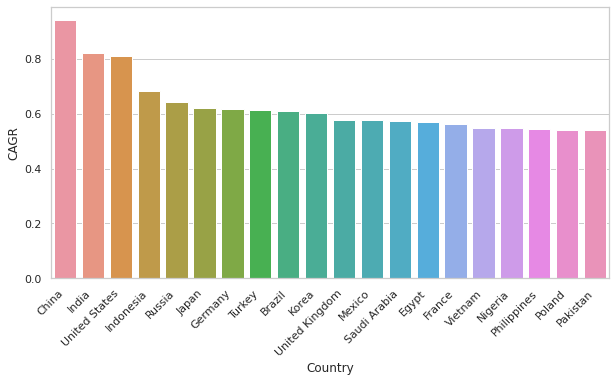

In [53]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
chart = sns.barplot(x="Country", y= "CAGR", data= gdp_cagr_best20)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [54]:
#best_20.pop(2020)

In [55]:
best_20.pop('CAGR')

35     0.942936
76     0.821785
185    0.808711
77     0.681116
142    0.642302
84     0.620231
63     0.618020
178    0.612195
23     0.610274
89     0.602196
184    0.578390
111    0.577488
147    0.573724
50     0.568028
59     0.564105
190    0.549089
126    0.546137
136    0.543608
137    0.541364
130    0.540941
Name: CAGR, dtype: float64

In [56]:
best_20.set_index("Country", inplace=True)

In [57]:
best_20=best_20.T

In [58]:
best_20.drop("index",axis=0)

Country,China,India,United States,Indonesia,Russia,Japan,Germany,Turkey,Brazil,Korea,United Kingdom,Mexico,Saudi Arabia,Egypt,France,Vietnam,Nigeria,Philippines,Poland,Pakistan
2005,6578.44,3240.42,13036.63,1357.30,2471.07,4059.40,2797.11,965.985,2047.82,1130.83,2035.37,1526.18,969.937,575.686,2039.69,325.235,491.605,367.350,577.593,534.730
2006,7639.70,3647.77,13814.60,1475.30,2753.43,4241.64,2991.70,1065.980,2193.24,1226.38,2155.44,1643.05,1027.160,633.700,2152.89,358.460,540.549,398.310,631.845,582.967
2007,8963.09,4112.91,14451.88,1611.06,3068.73,4427.64,3163.47,1149.680,2388.73,1332.36,2267.14,1725.85,1074.230,696.846,2264.33,394.332,595.691,436.073,694.465,631.771
2008,10019.22,4356.04,14712.83,1764.61,3292.58,4464.40,3256.12,1181.940,2559.27,1399.20,2304.74,1779.54,1163.570,761.238,2314.25,424.762,650.996,463.016,738.058,676.185
2009,11044.73,4761.46,14448.93,1861.67,3058.21,4254.78,3094.11,1134.930,2575.70,1421.04,2223.66,1698.33,1148.300,802.890,2264.90,451.104,710.754,471.903,764.658,683.798
2010,12353.67,5311.15,14992.05,2003.48,3233.18,4484.79,3261.15,1245.600,2802.32,1535.43,2293.43,1806.05,1220.220,854.054,2335.95,485.673,799.992,513.839,801.475,709.617
2011,13809.85,5782.04,15542.60,2171.52,3467.94,4573.19,3459.55,1412.940,2974.90,1625.28,2377.40,1911.32,1370.240,887.280,2437.04,527.617,856.619,543.771,859.270,750.693
2012,15186.64,6214.49,16197.05,2346.63,3665.23,4730.59,3540.98,1509.020,3090.41,1696.25,2458.84,2018.93,1472.090,924.430,2491.56,567.337,910.410,591.243,889.833,794.446
2013,16658.42,6727.34,16784.83,2520.49,3796.67,4909.87,3618.63,1665.880,3239.23,1780.63,2555.51,2082.17,1538.350,971.708,2549.89,609.350,976.355,644.114,918.048,838.158
2014,18205.30,7359.58,17527.28,2695.67,3894.00,5019.48,3767.35,1784.370,3315.85,1871.66,2670.67,2180.18,1624.050,1018.550,2621.91,660.486,1057.170,696.350,966.067,888.272


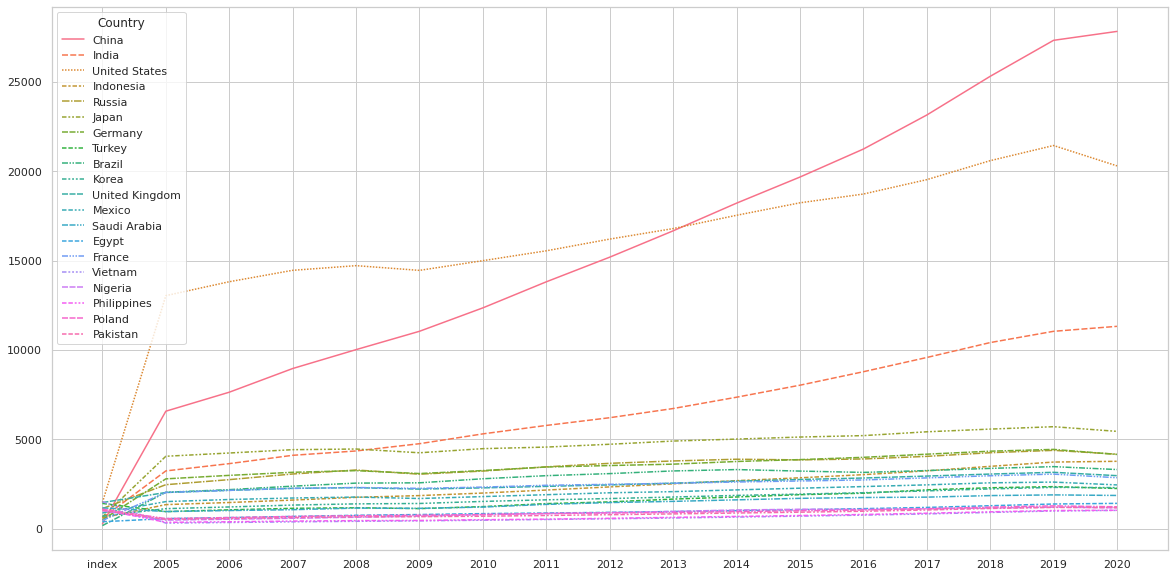

In [59]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=best_20)

In [60]:
best_10=gdp_cur.sort_values(by="CAGR", ascending=False).head(10)

In [61]:
#best_10.pop(2020)
best_10.pop('CAGR')
best_10.set_index("Country", inplace=True)
best_10=best_10.T
best_10.drop("index",axis=0)

Country,China,India,United States,Indonesia,Russia,Japan,Germany,Turkey,Brazil,Korea
2005,6578.44,3240.42,13036.63,1357.30,2471.07,4059.40,2797.11,965.985,2047.82,1130.83
2006,7639.70,3647.77,13814.60,1475.30,2753.43,4241.64,2991.70,1065.980,2193.24,1226.38
2007,8963.09,4112.91,14451.88,1611.06,3068.73,4427.64,3163.47,1149.680,2388.73,1332.36
2008,10019.22,4356.04,14712.83,1764.61,3292.58,4464.40,3256.12,1181.940,2559.27,1399.20
2009,11044.73,4761.46,14448.93,1861.67,3058.21,4254.78,3094.11,1134.930,2575.70,1421.04
2010,12353.67,5311.15,14992.05,2003.48,3233.18,4484.79,3261.15,1245.600,2802.32,1535.43
2011,13809.85,5782.04,15542.60,2171.52,3467.94,4573.19,3459.55,1412.940,2974.90,1625.28
2012,15186.64,6214.49,16197.05,2346.63,3665.23,4730.59,3540.98,1509.020,3090.41,1696.25
2013,16658.42,6727.34,16784.83,2520.49,3796.67,4909.87,3618.63,1665.880,3239.23,1780.63
2014,18205.30,7359.58,17527.28,2695.67,3894.00,5019.48,3767.35,1784.370,3315.85,1871.66


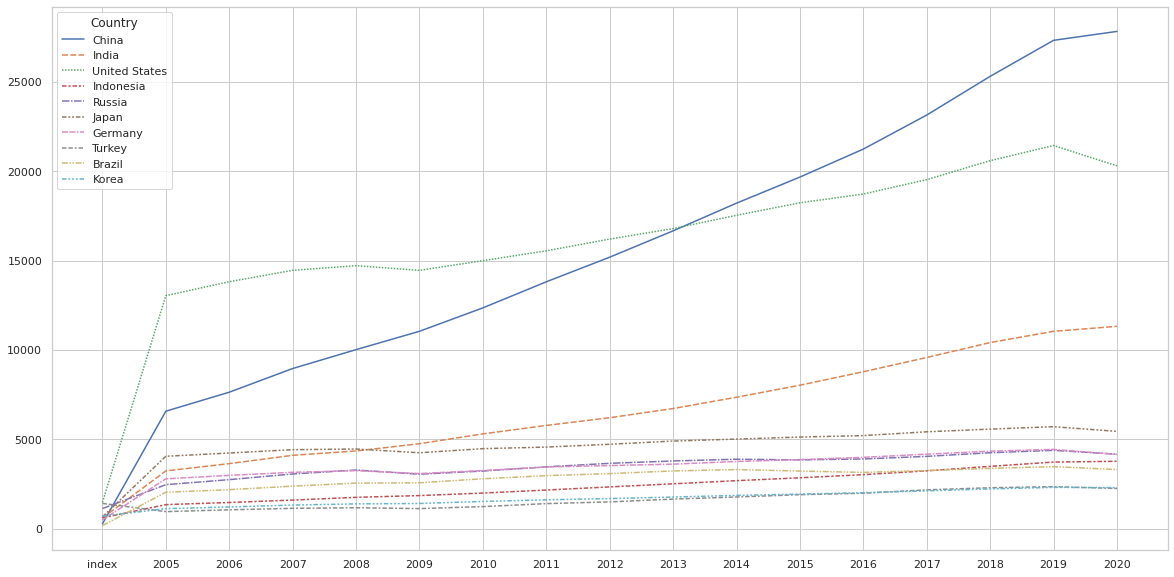

In [62]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=best_10)

As can be observed, among the top 10 best countries in terms of CAGR on GDP Current price for the last 15 years, China, USA and India tops the list. 

On an overall, there is an increasing trend. Due to COVID Pandemic, there is a significant reduction in the gdp projections for all counrties between 2019-2020. 

Also, note that no other event in the last 15 years has affected any economy out of the top 10 (including 2008 bubble) as COVID did. 

In [63]:
gdp_cagr_best20["CAGR"].mean()

0.6271321152602546

In [64]:
gdp_cagr_best20["CAGR"].head(10).mean()

0.6959766973188903

In [65]:
gdp_cagr_best20["CAGR"].head(5).mean()

0.7793701677059259

From the averages derived on the code blocks above, we can understand that except for the top 5 countries, most of the countries have almost similar growth rate throughout the period.

##Analysis of GDP Per Capita

GDP per capita measures the value of everything produced in a country during a year, divided by the number of people. The unit is in international dollars, fixed 2011 prices. The data is adjusted for inflation and differences in the cost of living between countries, so-called PPP dollars.

In [66]:
gdp_pc_con.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afghanistan,8.042,2.194,9.143,1.286,17.527,5.431,3.234,10.299,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291
10,Albania,6.068,6.573,6.787,8.328,4.053,4.223,2.822,1.585,1.187,1.985,2.517,3.480,3.898,4.328,2.095,-4.854
18,Algeria,4.324,0.172,1.825,0.191,-0.319,1.571,0.754,1.246,0.647,1.632,1.497,0.994,-0.849,-0.641,-1.232,-6.907
26,Angola,11.679,8.299,10.689,7.928,-2.079,1.805,0.458,5.381,1.898,1.770,-2.007,-5.492,-3.224,-4.151,-4.371,-4.246
34,Antigua and Barbuda,5.276,11.525,8.093,-1.097,-13.046,-8.561,-2.972,1.807,-2.106,2.225,2.252,3.901,1.584,5.763,3.696,-11.321


In [67]:
temp=gdp_pc_con.sort_values(by='2020', ascending=False)

In [68]:
temp.head(25)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
562,Guyana,-1.986,4.914,6.733,1.704,2.906,4.094,5.019,4.762,4.604,3.490,2.652,2.514,1.536,3.557,4.349,52.311
1386,Timor-Leste,1.156,-5.989,7.891,8.791,8.774,8.264,3.794,3.660,-0.335,1.903,0.688,1.203,-5.980,-3.030,0.762,25.777
1266,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-54.054,25.173,-0.236,-3.123,-19.110,-8.154,-4.096,7.937,1.739
1522,Vietnam,7.078,5.798,5.975,4.544,4.287,5.312,5.314,4.353,4.436,5.286,5.838,5.565,5.853,6.021,5.987,1.728
146,Benin,-1.246,0.975,3.004,1.976,-0.515,-0.712,0.117,1.920,4.242,3.439,-1.005,0.523,2.803,3.772,3.483,1.66
450,Ethiopia,9.747,8.674,8.967,9.449,8.268,8.858,9.646,6.988,8.169,8.563,8.661,6.299,8.474,6.007,6.206,1.612
154,Bhutan,4.780,5.243,11.486,9.612,4.512,8.151,8.528,5.198,2.321,2.702,4.928,6.101,5.027,2.471,4.052,1.421
970,Nepal,2.172,2.087,2.173,4.975,3.690,4.313,3.314,4.981,4.407,6.032,2.909,-0.319,6.790,4.908,5.670,1.186
1146,Rwanda,7.855,7.180,5.310,7.648,4.066,4.102,5.851,5.535,2.391,3.610,6.360,3.493,3.628,6.087,7.531,1.14
946,Myanmar,12.866,12.623,11.802,6.871,3.696,4.518,4.699,5.658,7.010,7.273,6.547,5.516,4.903,5.594,5.728,1.098


As can be seen from the top 25 list, all nations with the exception of the first two saw a sharp decline in GDP Per capita constant price. 

I have examined the economic conditions of the two nations with exception.

In the case of Guyana, this richness largely owes to the newly found oil wealth of the counrty. Please see the report [here](https://www.bloomberg.com/news/articles/2020-04-14/world-economy-may-be-crashing-but-guyana-still-seen-growing-53)

In the case of east timor, the reason behind the new rise is not clear. Reason behind an economic growth that took root in 2019 can be found [here](https://www.worldbank.org/en/news/press-release/2019/05/22/timor-lestes-economy-expected-to-rebound-after-contraction).



In [69]:
temp=temp[["Country","2019","2020"]]

In [70]:
temp["2020"] = temp["2020"].apply(lambda x: float(x))

In [71]:
temp["Difference"]= temp["2019"] - temp["2020"]

In [72]:
temp=temp.sort_values(by="Difference", ascending= False)

In [73]:
temp.head(20)

,Country,2019,2020,Difference
786,Libya,8.803,-59.071,67.874
810,Macao SAR,-6.671,-30.996,24.325
34,Antigua and Barbuda,3.696,-11.321,15.017
1202,Seychelles,2.918,-11.570,14.488
58,Aruba,-0.045,-14.072,14.027
378,Dominica,9.205,-4.677,13.882
842,Maldives,3.913,-9.592,13.505
1050,Palau,1.515,-11.949,13.464
1162,San Marino,0.582,-12.620,13.202
922,Montenegro,3.542,-9.035,12.577


As can be observed from the table, the countries that took a worst hit in 2020 in terms of GDP Per Capita on Constant Prices are smaller countries. 

Libiya was hurt by the [political war](https://www.worldbank.org/en/country/libya/publication/economic-update-october-2019#:~:text=The%20war%20around%20Tripoli%20that,(bpd)%20in%20April%202019.) in the country which began in April 2019. Macao SAR, another nation greatly affected in 2019 is brought down due to the contraction in gambling and tourism due to COVID. Its close proximity to China is another reason. Find more information [here](https://www.nordeatrade.com/en/explore-new-market/macau/economy)

In [74]:
temp.tail(30)

,Country,2019,2020,Difference
546,Guinea,3.068,0.410,2.658
866,Marshall Islands,1.800,-0.835,2.635
154,Bhutan,4.052,1.421,2.631
1178,Saudi Arabia,-1.636,-4.199,2.563
610,India,2.875,0.548,2.327
1450,Uganda,2.285,0.007,2.278
706,Kiribati,0.585,-1.664,2.249
1186,Senegal,2.372,0.140,2.232
442,Eswatini,0.046,-1.990,2.036
258,Central African Republic,1.256,-0.735,1.991


The table above shows the least 25 affected nations due to COVID on 2020 in terms of GDP per capita at current prices.

##Analysis - Unemployment Rate

In [75]:
unemployment.head(2)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
5,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Albania,14.1,13.8,13.4,13.1,13.8,14.0,14.0,13.4,15.9,17.5,17.1,15.2,13.7,12.3,12.0,11.8


In [76]:
unemployment=unemployment.dropna(axis=0, how='any')

In [77]:
unemployment["2020"] = unemployment["2020"].apply(lambda x: float(x))

In [78]:
unemployment.sort_values(by="2010", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
125,Belarus,1.704,1.416,1.063,0.940,0.901,0.827,0.668,0.614,0.508,0.488,0.912,1.017,0.768,0.428,0.308,2.322
1381,Thailand,1.858,1.517,1.364,1.372,1.500,1.050,0.658,0.675,0.700,0.800,0.900,1.000,1.200,1.100,1.100,1.100
1221,Singapore,3.125,2.650,2.125,2.225,3.025,2.175,2.025,1.950,1.900,1.950,1.900,2.075,2.175,2.100,2.250,2.450
813,Macao SAR,4.150,3.775,3.050,3.025,3.550,2.825,2.575,2.000,1.850,1.700,1.825,1.900,1.975,1.800,1.725,1.975
837,Malaysia,3.550,3.325,3.225,3.325,3.675,3.300,3.050,3.025,3.100,2.875,3.150,3.450,3.425,3.325,3.275,4.900
1341,Switzerland,3.763,3.332,2.766,2.577,3.701,3.516,2.843,2.905,3.158,3.044,3.178,3.323,3.088,2.547,2.306,2.725
717,Korea,3.750,3.475,3.258,3.175,3.633,3.708,3.408,3.225,3.100,3.492,3.592,3.675,3.683,3.833,3.783,4.500
1029,Norway,4.616,3.444,2.539,2.747,3.266,3.794,3.364,3.294,3.773,3.617,4.531,4.740,4.216,3.854,3.728,13.000
949,Myanmar,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000
581,Honduras,4.909,3.575,3.211,3.156,3.292,4.119,4.475,3.754,4.096,5.488,4.592,4.668,4.048,4.076,4.109,8.031


In [79]:
unemployment.sort_values(by="2015", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1381,Thailand,1.858,1.517,1.364,1.372,1.500,1.050,0.658,0.675,0.700,0.800,0.900,1.000,1.200,1.100,1.100,1.100
125,Belarus,1.704,1.416,1.063,0.940,0.901,0.827,0.668,0.614,0.508,0.488,0.912,1.017,0.768,0.428,0.308,2.322
813,Macao SAR,4.150,3.775,3.050,3.025,3.550,2.825,2.575,2.000,1.850,1.700,1.825,1.900,1.975,1.800,1.725,1.975
1221,Singapore,3.125,2.650,2.125,2.225,3.025,2.175,2.025,1.950,1.900,1.950,1.900,2.075,2.175,2.100,2.250,2.450
1205,Seychelles,3.624,2.511,1.863,1.716,5.136,4.605,4.130,3.705,3.325,2.983,2.684,2.684,3.000,3.000,3.000,3.000
837,Malaysia,3.550,3.325,3.225,3.325,3.675,3.300,3.050,3.025,3.100,2.875,3.150,3.450,3.425,3.325,3.275,4.900
1341,Switzerland,3.763,3.332,2.766,2.577,3.701,3.516,2.843,2.905,3.158,3.044,3.178,3.323,3.088,2.547,2.306,2.725
589,Hong Kong SAR,5.576,4.781,4.022,3.522,5.246,4.322,3.408,3.303,3.376,3.262,3.307,3.387,3.119,2.816,2.955,4.462
677,Japan,4.425,4.117,3.833,3.983,5.075,5.058,4.583,4.325,4.008,3.583,3.375,3.108,2.825,2.442,2.358,3.000
1413,Trinidad and Tobago,7.975,6.225,5.550,4.625,5.250,5.925,5.067,4.950,3.675,3.300,3.425,3.950,4.800,4.880,4.960,5.040


In [80]:
unemployment.sort_values(by="2020", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1381,Thailand,1.858,1.517,1.364,1.372,1.500,1.050,0.658,0.675,0.700,0.800,0.900,1.000,1.200,1.100,1.100,1.100
813,Macao SAR,4.150,3.775,3.050,3.025,3.550,2.825,2.575,2.000,1.850,1.700,1.825,1.900,1.975,1.800,1.725,1.975
125,Belarus,1.704,1.416,1.063,0.940,0.901,0.827,0.668,0.614,0.508,0.488,0.912,1.017,0.768,0.428,0.308,2.322
1221,Singapore,3.125,2.650,2.125,2.225,3.025,2.175,2.025,1.950,1.900,1.950,1.900,2.075,2.175,2.100,2.250,2.450
1341,Switzerland,3.763,3.332,2.766,2.577,3.701,3.516,2.843,2.905,3.158,3.044,3.178,3.323,3.088,2.547,2.306,2.725
677,Japan,4.425,4.117,3.833,3.983,5.075,5.058,4.583,4.325,4.008,3.583,3.375,3.108,2.825,2.442,2.358,3.000
1205,Seychelles,3.624,2.511,1.863,1.716,5.136,4.605,4.130,3.705,3.325,2.983,2.684,2.684,3.000,3.000,3.000,3.000
909,Moldova,7.300,7.400,5.100,4.000,6.400,7.400,6.700,5.600,5.100,3.900,5.016,4.226,4.130,3.022,3.022,3.022
509,Germany,11.008,10.042,8.567,7.383,7.667,6.933,5.858,5.367,5.233,5.008,4.625,4.158,3.758,3.400,3.158,3.886
949,Myanmar,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000


On analysis of unemployment rate over 2020, 2015, 2010 figures, we can see that Thailand, Macao SAR and Belarus perform consistantly good throughout. Infact, these are the nations with least unemployment rate

In [81]:
unemployment.sort_values(by="2020", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1261,South Africa,24.650,23.550,23.000,22.525,23.700,24.875,24.800,24.875,24.725,25.100,25.350,26.725,27.450,27.125,28.700,35.313
1317,Sudan,17.010,17.493,16.770,16.040,14.894,13.733,12.033,14.800,15.200,19.800,21.600,20.600,19.600,19.500,22.100,25.000
525,Greece,10.000,9.000,8.400,7.750,9.600,12.725,17.850,24.425,27.475,26.500,24.900,23.550,21.450,19.300,17.300,22.328
1277,Spain,9.153,8.453,8.233,11.245,17.855,19.858,21.390,24.788,26.095,24.443,22.058,19.635,17.225,15.255,14.105,20.801
1021,North Macedonia,37.250,36.025,34.925,33.775,32.175,32.050,31.375,31.000,29.000,28.025,26.050,23.750,22.375,20.725,17.250,20.387
53,Armenia,31.200,27.800,28.700,16.400,18.700,19.000,18.400,17.300,16.200,17.600,18.500,18.000,17.800,20.400,17.707,18.964
141,Belize,11.000,9.372,8.540,8.200,13.054,13.513,13.972,14.431,11.680,11.056,10.114,9.500,9.300,9.377,9.100,18.676
173,Bosnia and Herzegovina,31.096,31.096,29.013,23.408,24.068,27.202,27.600,28.000,27.500,27.500,27.700,25.400,20.500,18.400,15.700,18.000
1429,Turkey,9.488,9.034,9.183,10.020,13.053,11.127,9.096,8.432,9.041,9.915,10.279,10.907,10.904,10.955,13.709,17.200
885,Mauritius,9.567,9.081,8.522,7.222,7.328,7.800,7.900,8.100,8.000,7.800,7.900,7.300,7.100,6.900,6.700,17.000


In [82]:
unemployment.sort_values(by="2015", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
173,Bosnia and Herzegovina,31.096,31.096,29.013,23.408,24.068,27.202,27.600,28.000,27.500,27.500,27.700,25.400,20.500,18.400,15.700,18.000
1021,North Macedonia,37.250,36.025,34.925,33.775,32.175,32.050,31.375,31.000,29.000,28.025,26.050,23.750,22.375,20.725,17.250,20.387
1261,South Africa,24.650,23.550,23.000,22.525,23.700,24.875,24.800,24.875,24.725,25.100,25.350,26.725,27.450,27.125,28.700,35.313
525,Greece,10.000,9.000,8.400,7.750,9.600,12.725,17.850,24.425,27.475,26.500,24.900,23.550,21.450,19.300,17.300,22.328
1277,Spain,9.153,8.453,8.233,11.245,17.855,19.858,21.390,24.788,26.095,24.443,22.058,19.635,17.225,15.255,14.105,20.801
1317,Sudan,17.010,17.493,16.770,16.040,14.894,13.733,12.033,14.800,15.200,19.800,21.600,20.600,19.600,19.500,22.100,25.000
53,Armenia,31.200,27.800,28.700,16.400,18.700,19.000,18.400,17.300,16.200,17.600,18.500,18.000,17.800,20.400,17.707,18.964
1197,Serbia,21.830,21.560,18.800,14.400,16.900,20.000,23.600,24.600,23.000,19.894,18.231,15.917,14.051,13.273,10.909,13.408
13,Albania,14.100,13.800,13.400,13.100,13.800,14.000,14.000,13.400,15.900,17.500,17.100,15.200,13.700,12.300,12.000,11.800
341,Croatia,17.583,16.525,14.733,13.033,14.517,17.167,17.367,18.600,19.808,19.275,17.067,14.958,12.433,9.858,7.800,11.500


In [83]:
unemployment.sort_values(by="2010", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1021,North Macedonia,37.250,36.025,34.925,33.775,32.175,32.050,31.375,31.000,29.000,28.025,26.050,23.750,22.375,20.725,17.250,20.387
173,Bosnia and Herzegovina,31.096,31.096,29.013,23.408,24.068,27.202,27.600,28.000,27.500,27.500,27.700,25.400,20.500,18.400,15.700,18.000
1261,South Africa,24.650,23.550,23.000,22.525,23.700,24.875,24.800,24.875,24.725,25.100,25.350,26.725,27.450,27.125,28.700,35.313
1197,Serbia,21.830,21.560,18.800,14.400,16.900,20.000,23.600,24.600,23.000,19.894,18.231,15.917,14.051,13.273,10.909,13.408
1277,Spain,9.153,8.453,8.233,11.245,17.855,19.858,21.390,24.788,26.095,24.443,22.058,19.635,17.225,15.255,14.105,20.801
757,Latvia,10.050,7.042,6.058,7.742,17.567,19.467,16.208,15.048,11.868,10.847,9.875,9.642,8.715,7.415,6.318,8.000
53,Armenia,31.200,27.800,28.700,16.400,18.700,19.000,18.400,17.300,16.200,17.600,18.500,18.000,17.800,20.400,17.707,18.964
797,Lithuania,8.324,5.778,4.248,5.827,13.787,17.814,15.390,13.366,11.770,10.699,9.119,7.861,7.073,6.146,6.300,8.900
341,Croatia,17.583,16.525,14.733,13.033,14.517,17.167,17.367,18.600,19.808,19.275,17.067,14.958,12.433,9.858,7.800,11.500
437,Estonia,8.031,5.912,4.592,5.455,13.549,16.707,12.325,10.023,8.628,7.351,6.185,6.758,5.763,5.371,4.435,6.000


South Africa and Sudan are the worst affected countries in terms of COVID. Also, while taking a look at their chart for over the last 15 years we can see that their is an overall rising trend.

South African unemployment is largely due to the poor education system and also is affected by the racial segregation and political discrimation against the blacks. Institutions including educational are in towns which are settled largely by the whites and thus opportunities are very less to the majority population.

Similarly, in Sudan. poor education system and political instability is the root cause behind this high unemployment.

##Analysis - Inflation

In [84]:
infl_acp.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
3,Afghanistan,10.569,6.785,8.681,26.419,-6.811,2.179,11.804,6.441,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711
11,Albania,2.363,2.370,2.960,3.310,2.231,3.615,3.443,2.036,1.925,1.613,1.868,1.282,1.987,2.029,1.411,2.39
19,Algeria,1.382,2.315,3.674,4.855,5.743,3.913,4.500,8.916,3.255,2.917,4.784,6.398,5.591,4.270,1.952,3.5
27,Angola,22.961,13.305,12.249,12.465,13.721,14.480,13.484,10.285,8.782,7.298,9.159,30.694,29.844,19.629,17.079,20.719
35,Antigua and Barbuda,2.099,1.788,1.416,5.334,-0.550,3.370,3.457,3.377,1.059,1.089,0.969,-0.489,2.432,1.210,1.380,1.443


In [85]:
infl_eop.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
4,Afghanistan,10.562,4.285,16.092,18.814,-9.836,10.246,9.312,5.875,7.241,1.487,1.131,4.588,3.041,0.755,2.773,4.5
12,Albania,2.038,2.513,3.027,2.215,3.501,3.495,1.743,2.463,1.776,0.719,1.937,2.176,1.798,1.799,1.150,2.6
20,Algeria,1.226,3.839,4.803,4.863,5.753,2.725,5.160,9.035,1.148,5.253,4.362,6.957,4.933,2.702,2.434,3.3
28,Angola,18.530,12.207,11.776,13.170,13.987,15.322,11.376,9.042,7.687,7.498,12.091,41.125,23.667,18.604,16.893,20.979
36,Antigua and Barbuda,2.543,0.009,5.230,0.728,2.399,2.925,4.044,1.839,1.059,1.327,0.900,-1.121,2.356,1.741,1.574,1.348


In [86]:
infl_acp.sort_values(by="2010", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1515,Venezuela,15.955,13.663,18.699,31.441,26.041,28.187,26.090,21.069,40.639,62.169,121.738,254.949,438.117,65374.080,19906.020,15000
307,Democratic Republic of the Congo,21.545,12.845,16.672,17.966,46.101,23.464,14.950,0.857,0.876,1.240,0.738,3.153,35.787,29.266,4.769,11
547,Guinea,31.358,34.702,22.861,18.367,4.682,15.466,21.351,15.227,11.887,9.712,8.151,8.174,8.914,9.826,9.471,8.5
27,Angola,22.961,13.305,12.249,12.465,13.721,14.480,13.484,10.285,8.782,7.298,9.159,30.694,29.844,19.629,17.079,20.719
1011,Nigeria,17.856,8.218,5.401,11.581,12.536,13.742,10.825,12.225,8.495,8.048,9.010,15.696,16.502,12.094,11.397,13.393
1171,S�o Tom� and Pr�ncipe,17.152,23.075,18.550,31.991,16.957,13.339,14.321,10.638,8.106,6.988,5.256,5.433,5.693,8.270,8.356,7.867
1315,Sudan,8.506,7.199,14.754,14.297,11.257,12.978,18.097,35.559,36.522,36.907,16.910,17.750,32.352,63.293,50.994,81.284
667,Jamaica,13.419,8.924,9.152,22.030,9.574,12.610,7.531,6.897,9.344,8.290,3.677,2.349,4.388,3.729,3.910,5.1
939,Mozambique,6.428,13.245,8.161,14.503,3.789,12.426,11.167,2.602,4.261,2.560,3.551,19.853,15.113,3.911,2.785,5.194
1499,Uzbekistan,10.703,13.109,11.154,13.128,12.298,12.304,12.447,11.900,11.700,9.079,8.464,8.824,13.876,17.524,14.530,12.61


In [87]:
infl_acp.sort_values(by="2015", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1515,Venezuela,15.955,13.663,18.699,31.441,26.041,28.187,26.090,21.069,40.639,62.169,121.738,254.949,438.117,65374.080,19906.020,15000
1267,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.078,-0.039,1.656,52.813,379.849,187.852,83.502,51.187,8.14
1459,Ukraine,13.520,9.076,12.843,25.201,15.900,9.365,7.958,0.565,-0.261,12.100,48.684,13.913,14.443,10.947,7.886,4.521
427,Eritrea,12.506,15.060,9.409,22.168,33.852,10.297,5.887,4.753,5.938,10.033,28.483,-5.577,-13.306,-14.401,-16.365,4.461
1531,Yemen,9.867,10.845,7.905,18.976,3.675,11.175,19.544,9.885,10.968,8.159,22.000,21.300,30.400,27.600,10.000,26.7
827,Malawi,8.160,8.337,8.516,8.716,8.416,7.409,7.621,21.296,28.279,23.775,21.860,21.727,11.541,9.215,9.378,14.011
515,Ghana,15.095,11.683,10.729,16.505,13.139,6.698,7.676,7.072,11.666,15.486,17.153,17.455,12.372,9.837,7.208,9.653
1315,Sudan,8.506,7.199,14.754,14.297,11.257,12.978,18.097,35.559,36.522,36.907,16.910,17.750,32.352,63.293,50.994,81.284
1139,Russia,12.685,9.669,9.007,14.111,11.647,6.849,8.440,5.075,6.754,7.823,15.534,7.042,3.683,2.878,4.470,3.088
787,Libya,2.658,1.465,6.211,10.401,2.448,2.458,15.902,6.072,2.594,2.433,14.848,24.013,28.047,-1.196,4.563,22.256


In [88]:
infl_acp["2020"]=infl_acp["2020"].apply(lambda x: float(x))

In [89]:
infl_acp.sort_values(by="2020", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1515,Venezuela,15.955,13.663,18.699,31.441,26.041,28.187,26.090,21.069,40.639,62.169,121.738,254.949,438.117,65374.080,19906.020,15000.000
1547,Zimbabwe,-31.522,32.974,-72.729,156.964,6.216,3.045,3.470,3.720,1.632,-0.213,-2.410,-1.558,0.907,10.607,255.292,319.036
1315,Sudan,8.506,7.199,14.754,14.297,11.257,12.978,18.097,35.559,36.522,36.907,16.910,17.750,32.352,63.293,50.994,81.284
627,Islamic Republic of Iran,10.252,12.000,18.414,25.304,10.816,12.299,21.527,30.570,34.700,15.560,11.919,9.050,9.641,31.183,41.060,34.215
1323,Suriname,13.981,11.281,6.426,14.667,-0.300,6.948,17.684,5.009,1.916,3.384,6.896,55.501,22.024,6.939,4.392,27.893
1531,Yemen,9.867,10.845,7.905,18.976,3.675,11.175,19.544,9.885,10.968,8.159,22.000,21.300,30.400,27.600,10.000,26.700
787,Libya,2.658,1.465,6.211,10.401,2.448,2.458,15.902,6.072,2.594,2.433,14.848,24.013,28.047,-1.196,4.563,22.256
571,Haiti,16.758,14.227,8.950,14.376,3.430,4.136,7.385,6.780,6.776,3.944,7.524,13.378,14.738,12.885,17.346,22.189
27,Angola,22.961,13.305,12.249,12.465,13.721,14.480,13.484,10.285,8.782,7.298,9.159,30.694,29.844,19.629,17.079,20.719
763,Lebanon,-1.426,4.092,4.058,10.698,0.787,3.983,4.971,6.581,4.821,1.799,-3.696,-0.816,4.476,4.551,2.895,17.002


As you can observe from tables above, Venezula as a nation has been heavly affected by exponentially increasing inflation rates. My further readings pointed out that poor macro economic policies from administrators and excessive currency printing are the primary reasons for this situation. Please find more information [here](https://en.wikipedia.org/wiki/Hyperinflation_in_Venezuela).

Please find more information about the situation in Zimbabwe [here](https://www.aljazeera.com/economy/2019/9/27/imf-zimbabwe-has-the-highest-inflation-rate-in-the-world).

In [90]:
infl_acp.sort_values(by="2020", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
651,Israel,1.329,2.107,0.516,4.594,3.317,2.694,3.450,1.708,1.526,0.476,-0.632,-0.545,0.242,0.807,0.842,-1.902
1115,Puerto Rico,5.611,5.184,4.228,5.210,0.278,2.474,2.899,1.346,1.061,0.566,-0.751,-0.294,1.752,1.272,0.733,-1.549
1123,Qatar,8.875,11.790,13.672,15.120,-4.876,-2.406,2.036,1.786,3.199,4.200,0.960,2.662,0.463,0.184,-0.552,-1.190
1379,Thailand,4.519,4.664,2.203,5.462,-0.848,3.286,3.811,3.013,2.185,1.896,-0.900,0.188,0.665,1.064,0.706,-1.061
1411,Trinidad and Tobago,6.878,8.308,7.875,12.036,7.010,10.525,5.102,9.280,5.189,5.698,4.659,3.069,1.884,1.019,1.001,-1.003
1467,United Arab Emirates,6.195,9.285,11.128,12.272,1.562,0.878,0.877,0.662,1.101,2.346,4.070,1.617,1.967,3.069,-1.931,-1.000
1019,North Macedonia,-0.570,3.272,2.794,7.522,-0.739,1.508,3.905,3.317,2.785,-0.282,-0.300,-0.239,1.352,1.458,0.766,-0.907
1059,Panama,2.860,2.458,4.169,8.759,2.409,3.491,5.876,5.698,4.027,2.623,0.137,0.740,0.876,0.762,-0.355,-0.906
867,Marshall Islands,3.486,5.253,2.637,14.675,0.478,1.768,5.353,4.341,1.851,1.098,-2.236,-1.508,0.063,0.755,0.557,-0.871
147,Benin,4.676,6.355,1.194,6.767,0.398,2.179,2.736,6.743,0.969,-1.083,0.210,-0.794,1.769,0.849,-0.933,-0.801


In [91]:
infl_acp.sort_values(by="2015", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
763,Lebanon,-1.426,4.092,4.058,10.698,0.787,3.983,4.971,6.581,4.821,1.799,-3.696,-0.816,4.476,4.551,2.895,17.002
1547,Zimbabwe,-31.522,32.974,-72.729,156.964,6.216,3.045,3.470,3.720,1.632,-0.213,-2.410,-1.558,0.907,10.607,255.292,319.036
1291,St. Kitts and Nevis,3.374,8.487,4.481,5.300,2.058,0.851,5.835,0.816,1.107,0.248,-2.302,-0.688,0.696,-1.036,-0.179,0.884
867,Marshall Islands,3.486,5.253,2.637,14.675,0.478,1.768,5.353,4.341,1.851,1.098,-2.236,-1.508,0.063,0.755,0.557,-0.871
1307,St. Vincent and the Grenadines,3.444,3.015,6.994,10.122,0.373,0.752,3.186,2.598,0.805,0.194,-1.726,-0.187,2.183,2.324,0.906,0.866
347,Cyprus,2.026,2.252,2.171,4.384,0.180,2.559,3.481,3.088,0.384,-0.269,-1.544,-1.218,0.682,0.782,0.556,0.700
1339,Switzerland,1.173,1.064,0.735,2.428,-0.480,0.688,0.228,-0.693,-0.216,-0.012,-1.142,-0.434,0.535,0.935,0.361,-0.387
115,Barbados,6.065,7.308,4.034,8.108,3.645,5.824,9.432,4.533,1.814,1.767,-1.112,1.512,4.410,3.688,4.100,4.464
523,Greece,3.486,3.314,2.989,4.230,1.347,4.704,3.118,1.035,-0.854,-1.394,-1.094,0.013,1.138,0.774,0.517,-0.456
203,Bulgaria,6.038,7.416,7.572,11.951,2.469,3.039,3.386,2.391,0.385,-1.601,-1.067,-1.323,1.188,2.631,2.457,1.029


In [92]:
infl_acp.sort_values(by="2019", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
427,Eritrea,12.506,15.060,9.409,22.168,33.852,10.297,5.887,4.753,5.938,10.033,28.483,-5.577,-13.306,-14.401,-16.365,4.461
211,Burkina Faso,6.409,2.336,-0.233,10.668,0.864,-0.608,2.769,3.817,0.525,-0.258,0.914,-0.194,0.351,1.956,-3.233,3.200
1003,Niger,7.810,0.040,0.054,11.310,0.455,0.944,2.930,0.465,2.285,-0.890,0.961,0.179,0.190,2.753,-2.520,4.400
1467,United Arab Emirates,6.195,9.285,11.128,12.272,1.562,0.878,0.877,0.662,1.101,2.346,4.070,1.617,1.967,3.069,-1.931,-1.000
707,Kiribati,-0.351,-0.997,3.593,13.665,9.816,-3.900,1.497,-3.046,-1.488,2.104,0.572,1.917,0.356,0.564,-1.881,1.808
1179,Saudi Arabia,0.546,1.900,5.060,6.084,4.182,3.784,3.757,2.875,3.520,2.200,1.272,2.029,-0.852,2.483,-1.212,0.872
267,Chad,4.449,9.640,-7.440,8.333,10.103,-2.110,2.029,7.517,0.223,1.682,4.827,-1.632,-0.897,4.037,-0.972,2.241
147,Benin,4.676,6.355,1.194,6.767,0.398,2.179,2.736,6.743,0.969,-1.083,0.210,-0.794,1.769,0.849,-0.933,-0.801
219,Burundi,13.253,2.744,8.412,24.407,10.557,6.496,9.583,18.176,7.938,4.417,5.553,5.527,16.597,-2.767,-0.709,8.000
851,Mali,6.414,1.519,1.456,9.121,2.217,1.289,3.051,5.320,-2.383,2.730,1.442,-1.800,1.764,1.734,-0.591,0.569


In [93]:
infl_acp.sort_values(by="2010", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
707,Kiribati,-0.351,-0.997,3.593,13.665,9.816,-3.900,1.497,-3.046,-1.488,2.104,0.572,1.917,0.356,0.564,-1.881,1.808
1123,Qatar,8.875,11.790,13.672,15.120,-4.876,-2.406,2.036,1.786,3.199,4.200,0.960,2.662,0.463,0.184,-0.552,-1.190
1203,Seychelles,0.648,-1.858,5.324,36.965,31.754,-2.405,2.559,7.110,4.339,1.386,4.042,-1.014,2.859,3.699,1.807,4.509
267,Chad,4.449,9.640,-7.440,8.333,10.103,-2.110,2.029,7.517,0.223,1.682,4.827,-1.632,-0.897,4.037,-0.972,2.241
963,Nauru,8.662,19.302,5.601,1.035,22.422,-1.968,-3.370,0.262,-1.105,0.275,9.784,8.150,5.082,0.463,3.893,1.500
1443,Tuvalu,3.221,4.190,2.285,10.443,-0.283,-1.853,0.501,1.417,2.008,1.073,3.144,3.511,4.120,2.145,2.177,1.876
643,Ireland,2.201,2.665,2.898,3.119,-1.684,-1.619,1.195,1.892,0.538,0.301,-0.033,-0.192,0.251,0.708,0.877,0.400
755,Latvia,6.890,6.571,10.081,15.253,3.259,-1.224,4.222,2.285,0.011,0.690,0.213,0.099,2.894,2.554,2.747,-0.293
675,Japan,-0.283,0.252,0.063,1.384,-1.350,-0.721,-0.273,-0.056,0.343,2.761,0.793,-0.114,0.468,0.979,0.477,0.227
211,Burkina Faso,6.409,2.336,-0.233,10.668,0.864,-0.608,2.769,3.817,0.525,-0.258,0.914,-0.194,0.351,1.956,-3.233,3.200


Considering data from 2010, 2015, 2019 and 2020, we are not able to identify countries that consistently showcase low level of inflation

##Analysis - Net Lending

Net lending (+)/ borrowing (?) is calculated as revenue minus total expenditure. This is a core GFS balance that measures the extent to which general government is either putting financial resources at the disposal of other sectors in the economy and nonresidents (net lending), or utilizing the financial resources generated by other sectors and nonresidents (net borrowing). 

In [94]:
net_lending.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
6,Afghanistan,-0.965,0.643,-2.492,-3.882,-1.779,0.922,-0.672,0.182,-0.631,-1.719,-1.378,0.118,-0.630,1.502,-0.983,-4
14,Albania,-3.458,-3.263,-3.179,-4.884,-6.586,-3.520,-3.516,-3.441,-5.215,-5.458,-4.054,-1.762,-1.392,-1.346,-1.957,-5.393
22,Algeria,13.631,13.961,6.598,9.616,-5.807,-0.038,-0.104,-4.435,-0.400,-7.300,-15.267,-13.051,-6.647,-4.468,-5.081,-14.952
30,Angola,7.170,9.423,4.312,-4.235,-7.897,3.395,8.081,4.131,-0.304,-5.720,-2.917,-4.520,-6.304,2.189,0.695,-5.978
38,Antigua and Barbuda,-4.806,-7.464,-5.647,-5.368,-17.895,-0.277,-3.497,-1.108,-4.296,-2.870,-2.600,-0.145,-2.841,-3.100,-3.725,-9.46


In [95]:
net_lending["2020"]=net_lending["2020"].apply(lambda x: float(x))

In [96]:
net_lending.sort_values(by="2010", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
646,Ireland,1.566,2.769,0.263,-7.019,-13.826,-32.066,-12.847,-8.099,-6.181,-3.653,-1.951,-0.693,-0.305,0.052,0.302,-5.239
1446,Tuvalu,-13.467,-39.037,-19.647,-18.142,-13.971,-24.116,-9.127,10.021,29.298,-6.136,15.320,28.207,3.213,32.038,-8.601,-25.464
1390,Timor-Leste,-10.497,41.033,-29.932,-18.562,-17.170,-19.793,-25.084,-39.115,-14.367,-37.525,-33.062,-54.902,-33.384,-28.015,-32.075,-27.537
430,Eritrea,-28.683,-18.188,-20.232,-31.605,-21.046,-17.694,-5.998,-5.585,-8.023,-0.364,-3.139,-1.657,-6.037,4.212,-1.477,-4.970
846,Maldives,-7.807,-4.524,-3.158,-9.925,-17.886,-13.451,-6.811,-6.549,-4.337,-7.086,-6.789,-8.797,-6.344,-5.232,-5.580,-11.987
1174,S�o Tom� and Pr�ncipe,26.812,17.258,125.135,13.648,-19.257,-11.711,-12.518,-11.215,1.896,-5.307,-6.252,-4.235,-2.689,-1.883,-1.758,-4.480
526,Greece,-6.188,-5.946,-6.707,-10.176,-15.148,-11.197,-10.279,-6.556,-3.622,-4.070,-2.771,0.555,1.047,0.868,0.390,-8.974
1110,Portugal,-6.221,-4.233,-3.045,-3.761,-9.807,-11.191,-7.386,-5.662,-4.836,-7.120,-4.303,-1.970,-2.960,-0.446,0.190,-7.094
1486,United States,-3.069,-2.029,-2.910,-6.630,-13.197,-11.024,-9.703,-8.028,-4.564,-4.034,-3.566,-4.269,-4.471,-5.682,-5.782,-15.448
230,Cabo Verde,-6.003,-5.067,-0.941,-1.551,-5.804,-10.524,-7.652,-10.285,-9.308,-7.612,-4.555,-3.035,-2.972,-2.818,-1.814,-8.337


In [97]:
net_lending.sort_values(by="2015", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
790,Libya,31.355,31.807,28.581,32.502,-6.534,12.534,-17.237,28.556,-5.108,-73.810,-130.796,-113.180,-43.464,-0.194,8.783,-7.223
1390,Timor-Leste,-10.497,41.033,-29.932,-18.562,-17.170,-19.793,-25.084,-39.115,-14.367,-37.525,-33.062,-54.902,-33.384,-28.015,-32.075,-27.537
318,Republic of Congo,14.637,16.646,10.601,27.247,4.932,16.597,16.974,9.375,-3.648,-13.638,-24.753,-20.410,-7.387,6.617,5.784,5.700
102,Bahrain,2.914,2.338,1.586,4.257,-5.586,-5.834,-1.482,-5.509,-9.723,-1.569,-18.399,-17.552,-14.234,-11.944,-10.615,-15.708
1270,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,4.612,-14.810,-3.470,-9.242,-17.435,-15.531,3.311,-0.643,-0.271,-2.709
1038,Oman,12.805,13.988,12.038,16.797,-0.310,5.634,9.387,4.647,4.678,-1.080,-15.943,-21.309,-13.959,-7.944,-6.952,-16.904
1182,Saudi Arabia,17.987,20.823,11.784,29.802,-5.383,4.392,11.554,11.933,5.639,-3.542,-15.838,-17.203,-9.236,-5.871,-4.452,-12.593
374,Djibouti,-1.179,0.262,-1.883,0.623,-3.886,-1.045,-1.186,-2.044,-4.249,-6.877,-15.416,-8.308,-4.530,-2.782,-0.828,-2.724
22,Algeria,13.631,13.961,6.598,9.616,-5.807,-0.038,-0.104,-4.435,-0.400,-7.300,-15.267,-13.051,-6.647,-4.468,-5.081,-14.952
422,Equatorial Guinea,18.547,21.795,17.160,14.614,-6.475,-4.533,0.835,-7.239,-4.403,-7.541,-15.097,-10.917,-2.590,0.510,1.740,-4.756


In [98]:
net_lending.sort_values(by="2020", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1390,Timor-Leste,-10.497,41.033,-29.932,-18.562,-17.170,-19.793,-25.084,-39.115,-14.367,-37.525,-33.062,-54.902,-33.384,-28.015,-32.075,-27.537
198,Brunei Darussalam,16.328,19.739,3.118,36.014,3.610,7.612,25.632,15.786,13.025,3.576,-14.523,-21.680,-10.623,-3.559,-10.455,-26.578
1446,Tuvalu,-13.467,-39.037,-19.647,-18.142,-13.971,-24.116,-9.127,10.021,29.298,-6.136,15.320,28.207,3.213,32.038,-8.601,-25.464
638,Iraq,4.069,10.711,7.837,-0.856,-12.752,-4.179,4.744,4.094,-6.062,-5.631,-12.823,-13.894,-1.619,7.893,-0.771,-22.298
710,Kiribati,-10.113,-12.505,-12.978,-16.499,-9.065,-8.262,-19.327,-6.324,12.387,38.764,47.384,23.155,11.638,-1.148,8.795,-18.675
1318,Sudan,-1.876,-1.323,-2.842,0.491,-3.796,0.111,-2.327,-7.367,-5.759,-4.717,-3.824,-4.545,-6.473,-7.877,-10.818,-16.905
1038,Oman,12.805,13.988,12.038,16.797,-0.310,5.634,9.387,4.647,4.678,-1.080,-15.943,-21.309,-13.959,-7.944,-6.952,-16.904
102,Bahrain,2.914,2.338,1.586,4.257,-5.586,-5.834,-1.482,-5.509,-9.723,-1.569,-18.399,-17.552,-14.234,-11.944,-10.615,-15.708
62,Aruba,-2.993,-2.589,-1.071,1.517,-2.688,-3.579,-6.651,-9.242,-6.396,-7.861,-1.625,-1.634,-2.987,-2.223,0.390,-15.681
1486,United States,-3.069,-2.029,-2.910,-6.630,-13.197,-11.024,-9.703,-8.028,-4.564,-4.034,-3.566,-4.269,-4.471,-5.682,-5.782,-15.448


East Timor and Tuvalu are amongst the countries with highest government spending consistantly over the last 15 years. Specifically in the case of East Timor, this particular attribute can be considered as one of the main reason why they are experiencing sudden economic growth lately. Please refer to the [world bank report](https://www.worldbank.org/en/news/press-release/2019/05/22/timor-lestes-economy-expected-to-rebound-after-contraction) for more information about the same.

In [99]:
net_lending.sort_values(by="2010", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
734,Kuwait,43.304,31.895,37.411,20.164,27.513,25.962,33.281,32.428,34.114,22.364,5.593,0.302,6.266,9.045,4.766,-11.326
814,Macao SAR,8.362,9.797,16.466,17.571,13.435,19.487,24.762,24.069,26.978,23.966,13.722,11.335,13.178,14.155,15.325,2.745
318,Republic of Congo,14.637,16.646,10.601,27.247,4.932,16.597,16.974,9.375,-3.648,-13.638,-24.753,-20.410,-7.387,6.617,5.784,5.700
86,Azerbaijan,2.741,0.663,2.337,17.194,5.853,13.831,10.860,3.705,1.643,2.742,-4.814,-1.126,-1.366,5.547,8.419,-12.822
790,Libya,31.355,31.807,28.581,32.502,-6.534,12.534,-17.237,28.556,-5.108,-73.810,-130.796,-113.180,-43.464,-0.194,8.783,-7.223
1030,Norway,14.764,17.938,17.095,18.633,10.239,10.923,13.348,13.763,10.668,8.623,6.022,4.056,4.999,7.339,7.919,0.784
158,Bhutan,-6.916,0.252,2.065,-2.705,4.512,7.905,-1.757,-2.467,-5.928,2.927,-0.200,-1.935,-4.786,-3.287,0.642,-5.529
198,Brunei Darussalam,16.328,19.739,3.118,36.014,3.610,7.612,25.632,15.786,13.025,3.576,-14.523,-21.680,-10.623,-3.559,-10.455,-26.578
1126,Qatar,10.651,8.911,10.646,10.036,14.551,6.779,7.323,10.522,21.560,14.343,4.515,-5.375,-2.937,5.178,4.061,5.250
1246,Solomon Islands,-1.876,-1.313,1.730,-0.235,1.773,6.253,8.409,3.660,4.138,2.099,-0.006,-3.916,-4.478,0.676,-2.689,-7.260


In [100]:
net_lending.sort_values(by="2015", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
710,Kiribati,-10.113,-12.505,-12.978,-16.499,-9.065,-8.262,-19.327,-6.324,12.387,38.764,47.384,23.155,11.638,-1.148,8.795,-18.675
1446,Tuvalu,-13.467,-39.037,-19.647,-18.142,-13.971,-24.116,-9.127,10.021,29.298,-6.136,15.320,28.207,3.213,32.038,-8.601,-25.464
814,Macao SAR,8.362,9.797,16.466,17.571,13.435,19.487,24.762,24.069,26.978,23.966,13.722,11.335,13.178,14.155,15.325,2.745
382,Dominica,0.947,2.928,1.798,0.700,-0.309,-3.383,-4.402,-5.394,-2.863,-4.590,11.889,14.774,0.272,-19.730,-9.170,-4.530
966,Nauru,NaN,NaN,NaN,NaN,0.369,0.093,2.722,8.411,1.641,27.817,10.456,21.450,21.385,32.485,16.118,5.276
902,Micronesia,-5.561,-5.361,-3.497,-1.541,1.858,0.457,-0.575,0.885,2.863,11.125,10.345,7.256,14.241,24.986,16.444,5.676
1294,St. Kitts and Nevis,-3.527,-1.261,-2.858,-3.025,-2.310,-6.511,1.633,4.453,11.388,8.856,6.227,3.930,0.538,1.151,3.888,-6.805
1030,Norway,14.764,17.938,17.095,18.633,10.239,10.923,13.348,13.763,10.668,8.623,6.022,4.056,4.999,7.339,7.919,0.784
734,Kuwait,43.304,31.895,37.411,20.164,27.513,25.962,33.281,32.428,34.114,22.364,5.593,0.302,6.266,9.045,4.766,-11.326
1054,Palau,1.615,0.142,-2.093,-1.715,-0.877,-0.977,1.300,1.024,0.749,3.607,5.181,3.590,4.852,6.116,1.907,-4.982


In [101]:
net_lending.sort_values(by="2019", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
902,Micronesia,-5.561,-5.361,-3.497,-1.541,1.858,0.457,-0.575,0.885,2.863,11.125,10.345,7.256,14.241,24.986,16.444,5.676
966,Nauru,NaN,NaN,NaN,NaN,0.369,0.093,2.722,8.411,1.641,27.817,10.456,21.450,21.385,32.485,16.118,5.276
814,Macao SAR,8.362,9.797,16.466,17.571,13.435,19.487,24.762,24.069,26.978,23.966,13.722,11.335,13.178,14.155,15.325,2.745
710,Kiribati,-10.113,-12.505,-12.978,-16.499,-9.065,-8.262,-19.327,-6.324,12.387,38.764,47.384,23.155,11.638,-1.148,8.795,-18.675
790,Libya,31.355,31.807,28.581,32.502,-6.534,12.534,-17.237,28.556,-5.108,-73.810,-130.796,-113.180,-43.464,-0.194,8.783,-7.223
86,Azerbaijan,2.741,0.663,2.337,17.194,5.853,13.831,10.860,3.705,1.643,2.742,-4.814,-1.126,-1.366,5.547,8.419,-12.822
1030,Norway,14.764,17.938,17.095,18.633,10.239,10.923,13.348,13.763,10.668,8.623,6.022,4.056,4.999,7.339,7.919,0.784
318,Republic of Congo,14.637,16.646,10.601,27.247,4.932,16.597,16.974,9.375,-3.648,-13.638,-24.753,-20.410,-7.387,6.617,5.784,5.700
1510,Vanuatu,1.857,0.486,0.271,-0.042,-0.821,-2.515,-2.131,-1.626,-0.232,-3.477,-7.338,-3.940,-1.200,7.589,5.273,-13.666
534,Grenada,0.516,-5.649,-6.352,-4.146,-5.228,-3.615,-5.175,-5.882,-7.250,-4.664,-1.194,2.302,3.014,4.581,4.945,-0.431


In [102]:
net_lending.sort_values(by="2020", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
318,Republic of Congo,14.637,16.646,10.601,27.247,4.932,16.597,16.974,9.375,-3.648,-13.638,-24.753,-20.410,-7.387,6.617,5.784,5.700
902,Micronesia,-5.561,-5.361,-3.497,-1.541,1.858,0.457,-0.575,0.885,2.863,11.125,10.345,7.256,14.241,24.986,16.444,5.676
966,Nauru,NaN,NaN,NaN,NaN,0.369,0.093,2.722,8.411,1.641,27.817,10.456,21.450,21.385,32.485,16.118,5.276
1126,Qatar,10.651,8.911,10.646,10.036,14.551,6.779,7.323,10.522,21.560,14.343,4.515,-5.375,-2.937,5.178,4.061,5.250
814,Macao SAR,8.362,9.797,16.466,17.571,13.435,19.487,24.762,24.069,26.978,23.966,13.722,11.335,13.178,14.155,15.325,2.745
1030,Norway,14.764,17.938,17.095,18.633,10.239,10.923,13.348,13.763,10.668,8.623,6.022,4.056,4.999,7.339,7.919,0.784
870,Marshall Islands,-21.659,0.232,0.260,3.528,1.507,3.489,2.108,-0.753,-0.229,3.219,2.798,3.900,4.393,2.538,1.986,0.340
582,Honduras,-0.033,-1.355,-0.254,-0.267,-4.865,-3.371,-2.943,-3.483,-5.730,-2.897,-0.781,-0.397,-0.408,0.198,0.089,-0.031
566,Guyana,-8.532,-8.022,-4.284,-3.595,-3.518,-2.732,-3.022,-4.639,-3.250,-5.433,-1.193,-4.275,-4.322,-3.543,-4.704,-0.280
534,Grenada,0.516,-5.649,-6.352,-4.146,-5.228,-3.615,-5.175,-5.882,-7.250,-4.664,-1.194,2.302,3.014,4.581,4.945,-0.431


Macao SAR has an interesting story to tell. Due to the high income generation from gaming and tourism industry, the nations revenues are much higher than government expenditures. This showed a consistent pattern over the years.

Nauru, another nation which has less public expenditure consistantly over the years is experiencing a difficult negative growth. They largely depend on aids received from Australian government. This small island nation ran out of its rich source of phosphate. More information can be found [here](https://www.theguardian.com/world/2018/sep/04/corruption-incompetence-and-a-musical-naurus-riches-to-rags-tale). 

Micronesia is another nation which frequents at the top of the list over the years. On closer analysis, government holds most of the resource for themselves. The economy is filled with corruption and lack of freedom. Redtape and obstructions on starting and conducting business is one of the main reason behind the downfall of the economy. Find more information [here](https://www.heritage.org/index/country/micronesia).

##Analysis - Current Account

The current account represents a country's imports and exports of goods and services, payments made to foreign investors, and transfers such as foreign aid. The current account may be positive (a surplus) or negative (a deficit); positive means the country is a net exporter and negative means it is a net importer of goods and services. 

In our analysis, current account balance as a percentage of GDP is considered. 

In [103]:
current_account.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
7,Afghanistan,30.226,20.844,63.390,33.769,41.587,29.430,26.574,10.864,1.444,6.549,3.709,8.375,7.087,12.986,8.591,4.898
15,Albania,-9.106,-6.656,-10.580,-15.768,-15.383,-11.321,-12.917,-10.202,-9.253,-10.797,-8.609,-7.572,-7.492,-6.758,-7.621,-11.226
23,Algeria,20.526,24.738,22.671,20.146,0.300,7.541,9.889,5.880,0.398,-4.413,-16.442,-16.542,-13.187,-9.615,-9.609,-18.278
31,Angola,13.897,20.408,16.212,8.126,-10.769,8.957,11.705,10.818,6.107,-2.572,-8.841,-4.794,-0.518,6.990,2.899,-6.719
39,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.267,2.194,-2.428,-7.834,-13.638,-7.479,-25.567


In [104]:
current_account["2020"]=current_account["2020"].apply(lambda x: float(x))

In [105]:
current_account.sort_values(by="2020", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1071,Papua New Guinea,8.488,-1.713,2.156,4.866,-7.300,-19.656,-24.243,-36.707,-30.930,11.744,22.496,26.629,27.187,25.939,24.107,19.802
1223,Singapore,23.260,26.893,27.143,15.083,16.393,22.933,22.218,17.643,15.707,17.950,18.693,17.639,16.264,17.179,16.970,14.822
815,Macao SAR,23.994,14.742,21.635,16.033,28.165,39.430,40.860,39.256,40.234,34.170,25.317,28.096,32.319,34.602,34.802,13.076
431,Eritrea,0.432,-4.631,-7.897,-7.642,-11.366,-10.406,13.396,12.941,2.278,17.335,20.762,15.323,23.961,18.952,12.106,10.188
983,Netherlands,7.047,9.085,6.886,4.966,5.415,6.934,8.535,10.194,9.751,8.172,6.293,8.061,10.820,10.875,10.865,9.006
1359,Taiwan Province of China,3.996,5.992,7.875,5.962,10.404,8.266,7.834,8.661,9.735,11.321,13.614,13.121,14.066,11.649,10.531,8.235
1343,Switzerland,13.417,14.275,10.042,2.297,7.304,14.657,7.821,10.682,11.600,8.619,11.260,9.850,6.414,8.212,12.246,7.216
775,Lesotho,10.131,19.868,20.116,18.792,1.695,-9.359,-14.276,-8.822,-5.329,-5.065,-3.658,-6.569,-2.369,-1.232,-8.307,6.889
511,Germany,4.673,5.772,6.861,5.692,5.836,5.744,6.213,7.129,6.557,7.204,8.590,8.509,7.824,7.397,7.146,6.580
647,Ireland,-3.543,-5.351,-6.507,-6.239,-4.651,-1.195,-1.646,-3.391,1.554,1.076,4.402,-4.191,0.491,10.585,-9.457,6.265


In [106]:
current_account.sort_values(by="2019", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
711,Kiribati,-25.433,-8.774,-1.887,-3.649,-12.330,0.124,-9.515,1.902,-5.456,31.143,32.812,10.770,37.627,38.742,44.888,1.549
815,Macao SAR,23.994,14.742,21.635,16.033,28.165,39.430,40.860,39.256,40.234,34.170,25.317,28.096,32.319,34.602,34.802,13.076
1447,Tuvalu,-13.836,31.950,-12.970,7.162,6.903,-12.097,-37.556,18.431,-6.719,2.982,-53.513,21.454,23.997,7.104,25.624,-11.234
375,Djibouti,30.512,4.770,-25.776,-33.355,18.684,49.538,-1.813,-23.351,-30.776,23.972,29.345,-1.006,-4.831,18.015,24.710,-0.803
1071,Papua New Guinea,8.488,-1.713,2.156,4.866,-7.300,-19.656,-24.243,-36.707,-30.930,11.744,22.496,26.629,27.187,25.939,24.107,19.802
903,Micronesia,-10.064,-15.423,-10.675,-18.949,-21.145,-17.542,-19.264,-13.561,-9.941,6.110,4.457,7.155,10.279,21.040,17.087,3.371
1223,Singapore,23.260,26.893,27.143,15.083,16.393,22.933,22.218,17.643,15.707,17.950,18.693,17.639,16.264,17.179,16.970,14.822
1343,Switzerland,13.417,14.275,10.042,2.297,7.304,14.657,7.821,10.682,11.600,8.619,11.260,9.850,6.414,8.212,12.246,7.216
431,Eritrea,0.432,-4.631,-7.897,-7.642,-11.366,-10.406,13.396,12.941,2.278,17.335,20.762,15.323,23.961,18.952,12.106,10.188
983,Netherlands,7.047,9.085,6.886,4.966,5.415,6.934,8.535,10.194,9.751,8.172,6.293,8.061,10.820,10.875,10.865,9.006


In [107]:
current_account.sort_values(by="2015", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
711,Kiribati,-25.433,-8.774,-1.887,-3.649,-12.330,0.124,-9.515,1.902,-5.456,31.143,32.812,10.770,37.627,38.742,44.888,1.549
375,Djibouti,30.512,4.770,-25.776,-33.355,18.684,49.538,-1.813,-23.351,-30.776,23.972,29.345,-1.006,-4.831,18.015,24.710,-0.803
815,Macao SAR,23.994,14.742,21.635,16.033,28.165,39.430,40.860,39.256,40.234,34.170,25.317,28.096,32.319,34.602,34.802,13.076
1071,Papua New Guinea,8.488,-1.713,2.156,4.866,-7.300,-19.656,-24.243,-36.707,-30.930,11.744,22.496,26.629,27.187,25.939,24.107,19.802
431,Eritrea,0.432,-4.631,-7.897,-7.642,-11.366,-10.406,13.396,12.941,2.278,17.335,20.762,15.323,23.961,18.952,12.106,10.188
1223,Singapore,23.260,26.893,27.143,15.083,16.393,22.933,22.218,17.643,15.707,17.950,18.693,17.639,16.264,17.179,16.970,14.822
871,Marshall Islands,7.794,-0.841,3.806,0.764,-10.279,-14.834,1.016,-0.422,-6.212,3.421,17.221,16.134,7.529,6.516,3.662,-0.891
199,Brunei Darussalam,42.599,45.164,43.138,43.444,32.303,36.595,34.709,29.838,20.881,31.927,16.682,12.900,16.367,7.870,4.323,-1.249
1359,Taiwan Province of China,3.996,5.992,7.875,5.962,10.404,8.266,7.834,8.661,9.735,11.321,13.614,13.121,14.066,11.649,10.531,8.235
447,Eswatini,-3.230,-5.974,-1.889,-7.020,-11.572,-8.748,-5.840,5.026,10.840,11.571,12.922,7.823,6.950,1.994,6.163,3.516


In [108]:
current_account.sort_values(by="2010", ascending=False).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1391,Timor-Leste,56.703,119.785,215.068,314.907,164.452,180.180,210.367,230.699,171.381,75.577,12.753,-32.879,-17.659,-12.189,8.209,-28.111
375,Djibouti,30.512,4.770,-25.776,-33.355,18.684,49.538,-1.813,-23.351,-30.776,23.972,29.345,-1.006,-4.831,18.015,24.710,-0.803
967,Nauru,NaN,NaN,NaN,53.408,64.468,48.013,28.710,35.653,49.453,25.229,-21.312,2.034,12.666,-4.585,5.018,5.195
815,Macao SAR,23.994,14.742,21.635,16.033,28.165,39.430,40.860,39.256,40.234,34.170,25.317,28.096,32.319,34.602,34.802,13.076
199,Brunei Darussalam,42.599,45.164,43.138,43.444,32.303,36.595,34.709,29.838,20.881,31.927,16.682,12.900,16.367,7.870,4.323,-1.249
735,Kuwait,37.211,44.616,36.789,40.871,26.689,31.814,42.942,45.462,40.307,33.445,3.504,-4.623,7.960,14.498,8.909,-10.242
7,Afghanistan,30.226,20.844,63.390,33.769,41.587,29.430,26.574,10.864,1.444,6.549,3.709,8.375,7.087,12.986,8.591,4.898
87,Azerbaijan,1.261,17.632,27.256,33.593,22.969,28.423,25.983,21.405,16.610,13.863,-0.438,-3.604,4.071,12.844,9.232,-8.249
1223,Singapore,23.260,26.893,27.143,15.083,16.393,22.933,22.218,17.643,15.707,17.950,18.693,17.639,16.264,17.179,16.970,14.822
791,Libya,36.812,51.112,44.061,50.169,18.462,21.136,9.916,29.886,0.019,-78.446,-54.287,-24.646,7.988,1.789,-0.298,-6.584


Countries that frequent over the top interms of Current Account balance as a percentage of GDP are Djibouti, Macao SAR, Papua New Guinea 

In [109]:
current_account.sort_values(by="2010", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1247,Solomon Islands,-6.718,-9.136,-15.510,-18.247,-21.851,-32.784,-8.153,1.539,-3.408,-4.272,-3.046,-3.956,-4.884,-4.506,-6.374,-15.024
1175,S�o Tom� and Pr�ncipe,-20.892,-33.940,84.849,-17.611,-25.900,-22.794,-27.947,-21.847,-14.530,-20.746,-11.960,-6.076,-13.233,-11.110,-12.281,-10.645
159,Bhutan,-31.014,-4.616,8.350,-8.819,-6.418,-22.777,-30.485,-21.926,-26.011,-27.525,-27.892,-31.680,-23.642,-19.502,-23.073,-21.254
1215,Sierra Leone,-6.363,-5.043,-7.418,-8.977,-13.325,-22.703,-65.031,-31.833,-17.481,-9.273,-15.537,-9.225,-20.959,-18.681,-13.929,-14.281
1407,Tonga,-7.185,-10.820,-8.063,-11.172,-23.044,-21.948,-16.902,-12.329,-7.961,-10.020,-10.739,-6.597,-6.159,-5.493,-8.851,-14.751
767,Lebanon,-11.275,-8.825,-9.680,-17.250,-22.448,-20.692,-16.408,-25.904,-27.972,-28.843,-19.859,-23.792,-26.522,-26.708,-20.619,-12.642
927,Montenegro,-16.626,-31.654,-40.070,-49.471,-27.732,-20.310,-14.777,-15.280,-11.391,-12.410,-10.991,-16.235,-16.085,-17.001,-15.143,-17.949
423,Equatorial Guinea,16.805,19.213,16.660,7.850,-9.732,-20.244,-5.675,-1.125,-2.397,-4.251,-16.435,-12.974,-5.816,-5.437,-5.808,-10.394
783,Liberia,2.207,-7.288,-4.247,-29.289,-15.008,-19.760,-15.007,-12.326,-14.668,-20.515,-22.238,-19.249,-22.660,-22.381,-22.315,-18.667
1071,Papua New Guinea,8.488,-1.713,2.156,4.866,-7.300,-19.656,-24.243,-36.707,-30.930,11.744,22.496,26.629,27.187,25.939,24.107,19.802


In [110]:
current_account.sort_values(by="2015", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
791,Libya,36.812,51.112,44.061,50.169,18.462,21.136,9.916,29.886,0.019,-78.446,-54.287,-24.646,7.988,1.789,-0.298,-6.584
319,Republic of Congo,6.625,14.469,-28.311,8.508,-14.625,7.331,13.920,17.677,13.791,1.324,-54.199,-63.510,-3.538,7.234,8.423,-1.208
1447,Tuvalu,-13.836,31.950,-12.970,7.162,6.903,-12.097,-37.556,18.431,-6.719,2.982,-53.513,21.454,23.997,7.104,25.624,-11.234
943,Mozambique,-8.935,-8.120,-7.463,-9.076,-10.001,-14.708,-23.146,-41.766,-40.521,-36.529,-37.414,-35.582,-19.103,-30.887,-42.227,-68.792
159,Bhutan,-31.014,-4.616,8.350,-8.819,-6.418,-22.777,-30.485,-21.926,-26.011,-27.525,-27.892,-31.680,-23.642,-19.502,-23.073,-21.254
223,Burundi,-4.906,-21.464,-5.358,-0.975,1.718,-12.202,-14.465,-18.616,-19.674,-19.554,-23.738,-13.777,-14.180,-14.984,-16.398,-17.115
751,Lao P.D.R.,-15.821,-9.308,-10.387,-15.602,-17.770,-16.486,-15.265,-21.317,-26.506,-23.273,-22.421,-11.009,-10.638,-11.974,-7.234,-10.890
783,Liberia,2.207,-7.288,-4.247,-29.289,-15.008,-19.760,-15.007,-12.326,-14.668,-20.515,-22.238,-19.249,-22.660,-22.381,-22.315,-18.667
967,Nauru,NaN,NaN,NaN,53.408,64.468,48.013,28.710,35.653,49.453,25.229,-21.312,2.034,12.666,-4.585,5.018,5.195
767,Lebanon,-11.275,-8.825,-9.680,-17.250,-22.448,-20.692,-16.408,-25.904,-27.972,-28.843,-19.859,-23.792,-26.522,-26.708,-20.619,-12.642


In [111]:
current_account.sort_values(by="2019", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
943,Mozambique,-8.935,-8.120,-7.463,-9.076,-10.001,-14.708,-23.146,-41.766,-40.521,-36.529,-37.414,-35.582,-19.103,-30.887,-42.227,-68.792
567,Guyana,-7.423,-11.238,-7.544,-11.928,-7.231,-8.366,-12.176,-11.267,-13.033,-8.954,-4.571,-2.406,-6.175,-32.135,-40.318,-20.384
383,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.381,-4.653,-7.680,-8.832,-44.592,-29.358,-33.833
847,Maldives,-23.467,-19.171,-14.212,-26.863,-9.647,-7.322,-14.819,-6.645,-4.303,-3.656,-7.487,-23.638,-21.701,-26.399,-26.131,-23.135
1055,Palau,-24.025,-25.720,-18.827,-20.145,-10.478,-8.930,-12.564,-15.297,-14.107,-17.845,-8.710,-13.567,-19.141,-15.804,-23.610,-30.674
159,Bhutan,-31.014,-4.616,8.350,-8.819,-6.418,-22.777,-30.485,-21.926,-26.011,-27.525,-27.892,-31.680,-23.642,-19.502,-23.073,-21.254
783,Liberia,2.207,-7.288,-4.247,-29.289,-15.008,-19.760,-15.007,-12.326,-14.668,-20.515,-22.238,-19.249,-22.660,-22.381,-22.315,-18.667
767,Lebanon,-11.275,-8.825,-9.680,-17.250,-22.448,-20.692,-16.408,-25.904,-27.972,-28.843,-19.859,-23.792,-26.522,-26.708,-20.619,-12.642
831,Malawi,-13.280,-17.421,-8.223,-15.099,-10.199,-8.584,-8.613,-9.203,-8.358,-8.175,-17.198,-18.451,-25.606,-20.526,-17.188,-17.939
1207,Seychelles,-18.939,-13.161,-10.773,-18.483,-14.837,-19.380,-22.959,-21.138,-11.945,-23.111,-18.601,-20.571,-20.106,-17.940,-16.682,-27.791


In [112]:
current_account.sort_values(by="2020", ascending=True).head(10)

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
943,Mozambique,-8.935,-8.120,-7.463,-9.076,-10.001,-14.708,-23.146,-41.766,-40.521,-36.529,-37.414,-35.582,-19.103,-30.887,-42.227,-68.792
383,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.381,-4.653,-7.680,-8.832,-44.592,-29.358,-33.833
1055,Palau,-24.025,-25.720,-18.827,-20.145,-10.478,-8.930,-12.564,-15.297,-14.107,-17.845,-8.710,-13.567,-19.141,-15.804,-23.610,-30.674
1391,Timor-Leste,56.703,119.785,215.068,314.907,164.452,180.180,210.367,230.699,171.381,75.577,12.753,-32.879,-17.659,-12.189,8.209,-28.111
1207,Seychelles,-18.939,-13.161,-10.773,-18.483,-14.837,-19.380,-22.959,-21.138,-11.945,-23.111,-18.601,-20.571,-20.106,-17.940,-16.682,-27.791
535,Grenada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.553,-12.507,-11.049,-14.435,-15.922,-15.788,-27.743
39,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.267,2.194,-2.428,-7.834,-13.638,-7.479,-25.567
847,Maldives,-23.467,-19.171,-14.212,-26.863,-9.647,-7.322,-14.819,-6.645,-4.303,-3.656,-7.487,-23.638,-21.701,-26.399,-26.131,-23.135
551,Guinea,-0.830,-3.125,-7.298,-6.582,-5.640,-6.397,-18.353,-19.933,-12.517,-12.860,-12.949,-31.905,-6.724,-18.738,-13.701,-22.935
239,Cambodia,-3.824,-0.646,-1.664,-6.620,-9.915,-8.751,-8.031,-8.623,-8.462,-8.556,-8.739,-8.479,-7.915,-11.399,-12.533,-22.179


As can be seen from the tables above. one of the most frequent nation is Mosambique. Mosambique, a coastal nation in South Africa is one of the most strongest growing among its sister nations of the region. However, economic mismanagement, corruption and political instability including brutal civil war worsened its external debts and international economic relations. Find more information [here](https://theodora.com/wfbcurrent/mozambique/mozambique_economy.html).

The economy of Dominica, which recently began frequenting the top part of the list used to be primarily agrarian. The government wanted to nurture an offshore financial industry in the nation to improve its productivity. This agenda was partly ruined by Hurricane Maria which destroyed the agriculture, infrastructure and all other phyiscal forms of wealth. Find more information [here](https://theodora.com/wfbcurrent/mozambique/mozambique_economy.html).



#Effect of COVID-19

##Preparing Dataset

In [113]:
list_subject

['Gross domestic product, constant prices',
 'Gross domestic product, current prices',
 'Gross domestic product per capita, constant prices',
 'Inflation, average consumer prices',
 'Inflation, end of period consumer prices',
 'Unemployment rate',
 'General government net lending/borrowing',
 'Current account balance',
 nan]

In [114]:
gdp_pc_con.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afghanistan,8.042,2.194,9.143,1.286,17.527,5.431,3.234,10.299,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291
10,Albania,6.068,6.573,6.787,8.328,4.053,4.223,2.822,1.585,1.187,1.985,2.517,3.480,3.898,4.328,2.095,-4.854
18,Algeria,4.324,0.172,1.825,0.191,-0.319,1.571,0.754,1.246,0.647,1.632,1.497,0.994,-0.849,-0.641,-1.232,-6.907
26,Angola,11.679,8.299,10.689,7.928,-2.079,1.805,0.458,5.381,1.898,1.770,-2.007,-5.492,-3.224,-4.151,-4.371,-4.246
34,Antigua and Barbuda,5.276,11.525,8.093,-1.097,-13.046,-8.561,-2.972,1.807,-2.106,2.225,2.252,3.901,1.584,5.763,3.696,-11.321


In [115]:
gdp_pc_con.columns

Index(['Country', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [117]:
short=gdp_pc_con[["Country", '2015', '2016', '2017', '2018', '2019', '2020']]

In [118]:
short.head()

,Country,2015,2016,2017,2018,2019,2020
2,Afghanistan,-1.941,-0.547,0.358,1.268,1.654,-4.291
10,Albania,2.517,3.480,3.898,4.328,2.095,-4.854
18,Algeria,1.497,0.994,-0.849,-0.641,-1.232,-6.907
26,Angola,-2.007,-5.492,-3.224,-4.151,-4.371,-4.246
34,Antigua and Barbuda,2.252,3.901,1.584,5.763,3.696,-11.321


In [120]:
short["2020"]=short["2020"].apply(lambda x: float(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
short.describe()

,2015,2016,2017,2018,2019,2020
count,192.000000,192.000000,192.000000,192.000000,192.000000,191.000000
mean,1.191958,1.351542,1.958557,1.996219,1.345286,-4.694696
std,5.236079,3.868518,5.620637,3.166397,3.812857,7.193314
min,-30.092000,-19.110000,-14.920000,-15.232000,-32.135000,-59.071000
25%,0.012250,0.115500,0.596000,0.621750,0.156250,-7.088000
50%,1.794000,1.955500,1.993500,2.026000,1.642000,-4.836000
75%,3.597000,3.312250,3.731250,3.779500,3.196500,-2.242500
max,23.886000,12.153000,62.392000,16.713000,9.205000,52.311000


In [124]:
short.sort_values("2019", ascending=False).head(10)

,Country,2015,2016,2017,2018,2019,2020
378,Dominica,-2.551,2.522,-9.530,0.533,9.205,-4.677
786,Libya,-13.883,-8.305,62.392,16.713,8.803,-59.071
1266,South Sudan,-3.123,-19.110,-8.154,-4.096,7.937,1.739
50,Armenia,3.074,0.121,7.993,5.608,7.588,-1.487
1146,Rwanda,6.360,3.493,3.628,6.087,7.531,1.140
106,Bangladesh,5.746,6.102,6.481,6.906,6.773,0.973
450,Ethiopia,8.661,6.299,8.474,6.007,6.206,1.612
1522,Vietnam,5.838,5.565,5.853,6.021,5.987,1.728
282,China,6.371,6.224,6.380,6.344,5.756,0.872
946,Myanmar,6.547,5.516,4.903,5.594,5.728,1.098


In [135]:
short["Average"]= (short["2015"]+short["2016"]+short["2017"]+short["2018"]+short["2019"])/5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
short.sort_values("Average", ascending=False).head(10)

,Country,2015,2016,2017,2018,2019,2020,Average
786,Libya,-13.883,-8.305,62.392,16.713,8.803,-59.071,13.1440
642,Ireland,23.886,2.430,6.940,6.967,4.180,-7.886,8.8806
450,Ethiopia,8.661,6.299,8.474,6.007,6.206,1.612,7.1294
106,Bangladesh,5.746,6.102,6.481,6.906,6.773,0.973,6.4016
282,China,6.371,6.224,6.380,6.344,5.756,0.872,6.2150
1522,Vietnam,5.838,5.565,5.853,6.021,5.987,1.728,5.8528
946,Myanmar,6.547,5.516,4.903,5.594,5.728,1.098,5.6576
1442,Tuvalu,8.806,5.473,4.193,3.260,5.588,-1.337,5.4640
234,Cambodia,5.305,5.176,5.393,5.944,5.463,-3.042,5.4562
1130,Romania,4.277,5.410,7.748,5.043,4.751,-4.994,5.4458


In [138]:
short.describe()

,2015,2016,2017,2018,2019,2020,Average
count,192.000000,192.000000,192.000000,192.000000,192.000000,191.000000,192.000000
mean,1.191958,1.351542,1.958557,1.996219,1.345286,-4.694696,1.568712
std,5.236079,3.868518,5.620637,3.166397,3.812857,7.193314,3.064650
min,-30.092000,-19.110000,-14.920000,-15.232000,-32.135000,-59.071000,-17.413600
25%,0.012250,0.115500,0.596000,0.621750,0.156250,-7.088000,0.483400
50%,1.794000,1.955500,1.993500,2.026000,1.642000,-4.836000,1.747800
75%,3.597000,3.312250,3.731250,3.779500,3.196500,-2.242500,3.267050
max,23.886000,12.153000,62.392000,16.713000,9.205000,52.311000,13.144000


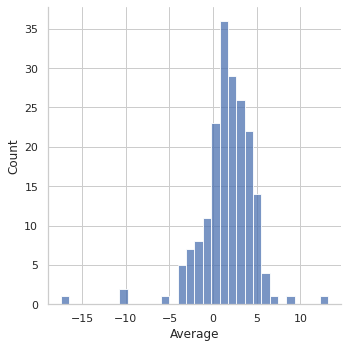

In [137]:
sns.displot(short, x="Average")

Based on the distribution plot above, we can manually cluster nations into 4 categories so that we can further analyze them.

Categories:



In [150]:
short.reset_index(inplace=True)

In [151]:
short.head()

,level_0,index,Country,2015,2016,2017,2018,2019,2020,Average
0,0,2,Afghanistan,-1.941,-0.547,0.358,1.268,1.654,-4.291,0.1584
1,1,10,Albania,2.517,3.480,3.898,4.328,2.095,-4.854,3.2636
2,2,18,Algeria,1.497,0.994,-0.849,-0.641,-1.232,-6.907,-0.0462
3,3,26,Angola,-2.007,-5.492,-3.224,-4.151,-4.371,-4.246,-3.8490
4,4,34,Antigua and Barbuda,2.252,3.901,1.584,5.763,3.696,-11.321,3.4392


In [153]:
short["Class"]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
for i in range(len(short["Average"])):
    if (short["Average"][i]<0.4834):
      short["Class"][i]=0
    elif ((short["Average"][i]>0.4834) & (short["Average"][i]<=1.747800)):
      short["Class"][i]=1
    elif ((short["Average"][i]>1.747800) & (short["Average"][i]<=3.267050)):
      short["Class"][i]=2
    else:
      short["Class"][i]=3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [160]:
short.head()

,level_0,index,Country,2015,2016,2017,2018,2019,2020,Average,Class
0,0,2,Afghanistan,-1.941,-0.547,0.358,1.268,1.654,-4.291,0.1584,0
1,1,10,Albania,2.517,3.480,3.898,4.328,2.095,-4.854,3.2636,2
2,2,18,Algeria,1.497,0.994,-0.849,-0.641,-1.232,-6.907,-0.0462,0
3,3,26,Angola,-2.007,-5.492,-3.224,-4.151,-4.371,-4.246,-3.8490,0
4,4,34,Antigua and Barbuda,2.252,3.901,1.584,5.763,3.696,-11.321,3.4392,3


I have grouped nations into 4 equal classes based on their per capita income average over 2015-2019

In [191]:
short["Diff"]=(short["2020"]-short["2019"])/abs(short["2019"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
temp=short.groupby("Class")["Average"].mean()

In [193]:
print(temp)

Class
0   -2.037362
1    1.087967
2    2.455162
3    4.769083
Name: Average, dtype: float64


In [194]:
v_good=short.loc[short["Class"]==3]

In [184]:
len(v_good)

50

In [195]:
good=short.loc[short["Class"]==2]

In [196]:
len(good)

48

In [197]:
bad=short.loc[short["Class"]==1]

In [198]:
v_bad=short.loc[short["Class"]==0]

In [199]:
v_bad.head()

,level_0,index,Country,2015,2016,2017,2018,2019,2020,Average,Class,Diff
0,0,2,Afghanistan,-1.941,-0.547,0.358,1.268,1.654,-4.291,0.1584,0,-3.594317
2,2,18,Algeria,1.497,0.994,-0.849,-0.641,-1.232,-6.907,-0.0462,0,-4.606331
3,3,26,Angola,-2.007,-5.492,-3.224,-4.151,-4.371,-4.246,-3.8490,0,0.028598
5,5,42,Argentina,1.630,-3.110,1.609,-3.467,-3.132,-6.653,-1.2940,0,-1.124202
7,7,58,Aruba,-1.726,-0.543,1.884,0.640,-0.045,-14.072,0.0420,0,-311.711111


In [201]:
v_bad.sort_values("Diff",ascending=True).head()

,level_0,index,Country,2015,2016,2017,2018,2019,2020,Average,Class,Diff
7,7,58,Aruba,-1.726,-0.543,1.884,0.640,-0.045,-14.072,0.0420,0,-311.711111
177,177,1418,Tunisia,0.002,0.099,0.779,1.545,-0.020,-5.241,0.4810,0,-261.050000
33,33,266,Chad,-1.454,-8.483,-5.337,-0.744,-0.068,-3.069,-3.2172,0,-44.132353
23,23,186,Brazil,-4.384,-4.077,0.506,0.491,0.338,-5.936,-1.4252,0,-18.562130
85,85,682,Jordan,-1.340,-1.131,-0.479,-0.133,0.339,-5.045,-0.5488,0,-15.882006


In [240]:
v_bad_short=v_bad[["Country","Diff"]]
v_bad_short.sort_values("Diff",ascending=True).head(10)

,Country,Diff
7,Aruba,-311.711111
177,Tunisia,-261.050000
33,Chad,-44.132353
23,Brazil,-18.562130
85,Jordan,-15.882006
11,The Bahamas,-14.793205
126,Nigeria,-14.355263
176,Trinidad and Tobago,-12.672973
191,Yemen,-8.345890
165,Suriname,-6.545538


These are the worst affected countries by COVID 19, in terms of per capita income.

In [241]:
current_account["CA_Diff"]=(current_account["2020"]-current_account["2019"])/abs(current_account["2019"])

In [242]:
ca_short=current_account[["Country","CA_Diff"]]

In [243]:
ca_short.head()

,Country,CA_Diff
7,Afghanistan,-0.429868
15,Albania,-0.473035
23,Algeria,-0.902175
31,Angola,-3.317696
39,Antigua and Barbuda,-2.418505


In [244]:
v_bad_short=v_bad_short.merge(right=ca_short, how="left", on="Country")

In [245]:
v_bad_short.head(1)

,Country,Diff,CA_Diff
0,Afghanistan,-3.594317,-0.429868


In [246]:
infl_acp["INF_Diff"]=(infl_acp["2020"]-infl_acp["2019"])/abs(infl_acp["2019"])

In [247]:
unemployment["UE_Diff"]=(unemployment["2020"]-unemployment["2019"])/abs(unemployment["2019"])

In [248]:
infl_short=infl_acp[["Country","INF_Diff"]]
unemployment_short=unemployment[["Country","UE_Diff"]]

In [249]:
v_bad_short=v_bad_short.merge(right=infl_short, how="left", on="Country")

In [250]:
v_bad_short=v_bad_short.merge(right=unemployment_short, how="left", on="Country")

In [253]:
v_bad_short.sort_values(by="Diff", ascending=True).head(20)

,Country,Diff,CA_Diff,INF_Diff,UE_Diff
4,Aruba,-311.711111,-48.790179,-0.644350,-0.005302
42,Tunisia,-261.050000,0.147794,-0.083309,NaN
13,Chad,-44.132353,-1.651139,3.305556,NaN
10,Brazil,-18.562130,0.341636,-0.047683,0.232704
23,Jordan,-15.882006,-1.091733,-0.326599,NaN
6,The Bahamas,-14.793205,-23.632143,0.775281,0.136163
31,Nigeria,-14.355263,0.124572,0.175134,NaN
41,Trinidad and Tobago,-12.672973,-1.637449,-2.001998,0.016129
45,Yemen,-8.345890,0.622393,1.670000,NaN
39,Suriname,-6.545538,-0.121464,5.350865,0.099070


As can be observed, no fixed pattern in relationships between GDP, Current Account Balance, Inflation and Unemployment can be identified

In [254]:
bad.head(1)

,level_0,index,Country,2015,2016,2017,2018,2019,2020,Average,Class,Diff
8,8,66,Australia,0.837,1.069,0.874,1.106,0.294,-8.088,0.836,1,-28.510204


In [255]:
bad.describe()

,level_0,index,2015,2016,2017,2018,2019,2020,Average,Class,Diff
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000
mean,98.729167,791.833333,0.741417,1.388146,1.117854,1.309750,0.882667,-6.016479,1.087967,1.0,-11.381403
std,52.786902,422.295215,2.046627,1.866479,1.438227,1.243844,1.195190,2.493767,0.349445,0.0,10.758369
min,8.000000,66.000000,-9.415000,-1.077000,-5.042000,-3.131000,-1.377000,-12.620000,0.484200,1.0,-44.260870
25%,60.500000,486.000000,0.142250,0.606250,0.840250,0.727000,0.256750,-7.617250,0.784900,1.0,-14.526175
50%,98.000000,786.000000,0.920000,1.159500,1.307000,1.374000,0.796500,-6.476000,1.117800,1.0,-7.239340
75%,142.750000,1144.000000,1.811250,1.966000,1.857500,1.939000,1.519000,-4.471250,1.330700,1.0,-3.556995
max,188.000000,1506.000000,3.818000,12.153000,3.287000,3.850000,3.740000,-0.471000,1.721800,1.0,-0.026144


In [257]:
bad_short=bad[["Country","Diff"]]
bad_short.sort_values("Diff",ascending=False).head(10)

,Country,Diff
117,Mozambique,-0.026144
61,The Gambia,-1.170723
102,Madagascar,-2.005693
109,Mauritania,-2.151874
103,Malawi,-2.160000
86,Kazakhstan,-2.187520
125,Niger,-2.474576
139,Puerto Rico,-2.507921
36,Colombia,-2.513770
73,Hong Kong SAR,-2.632534


In [258]:
bad_short=bad_short.merge(right=ca_short, how="left", on="Country")

In [261]:
bad_short=bad_short.merge(right=infl_short, how="left", on="Country")
bad_short=bad_short.merge(right=unemployment_short, how="left", on="Country")

In [262]:
bad_short.sort_values("Diff",ascending=False).head(10)

,Country,Diff,CA_Diff,INF_Diff,UE_Diff
29,Mozambique,-0.026144,-0.629100,0.864991,NaN
12,The Gambia,-1.170723,-0.819911,-0.051855,NaN
25,Madagascar,-2.005693,-0.136992,-0.021874,NaN
27,Mauritania,-2.151874,-0.637161,0.669991,NaN
26,Malawi,-2.160000,-0.043693,0.494029,NaN
22,Kazakhstan,-2.187520,-0.873861,0.316171,0.627746
31,Niger,-2.474576,-0.022811,2.746032,NaN
34,Puerto Rico,-2.507921,NaN,-3.113233,0.529412
7,Colombia,-2.513770,-0.095942,-0.002556,0.161905
16,Hong Kong SAR,-2.632534,-0.036640,-0.301920,0.509983


In [263]:
good_short=good[["Country","Diff"]]
good_short=good_short.merge(right=ca_short, how="left", on="Country")
good_short=good_short.merge(right=infl_short, how="left", on="Country")
good_short=good_short.merge(right=unemployment_short, how="left", on="Country")
good_short.sort_values("Diff",ascending=False).head(10)

,Country,Diff,CA_Diff,INF_Diff,UE_Diff
15,Guyana,11.028282,0.494419,-0.135755,NaN
1,Benin,-0.523399,-0.052600,0.141479,NaN
33,Paraguay,-0.975773,-1.235174,0.055132,-0.015331
46,Uganda,-0.996937,-0.018415,0.372255,NaN
10,Egypt,-1.107098,-0.181515,-0.577569,0.195309
13,Ghana,-1.133030,-0.631733,0.339206,NaN
3,Burkina Faso,-1.328397,0.019752,1.989793,NaN
24,Micronesia,-1.460821,-0.802716,0.111048,NaN
23,Marshall Islands,-1.463889,-1.243310,-2.563734,NaN
43,Togo,-1.544183,-0.257686,1.911208,NaN


In [269]:
v_good_short=v_good[["Country","Diff"]]
v_good_short=v_good_short.merge(right=ca_short, how="left", on="Country")
v_good_short=v_good_short.merge(right=infl_short, how="left", on="Country")
v_good_short=v_good_short.merge(right=unemployment_short, how="left", on="Country")

In [274]:
v_good_short.sort_values("Diff",ascending=False).head(20)

,Country,Diff,CA_Diff,INF_Diff,UE_Diff
3,Bhutan,-0.649309,0.078837,0.181538,NaN
49,Vietnam,-0.711375,-0.817931,0.144083,NaN
14,Ethiopia,-0.740251,0.009028,-0.028083,NaN
34,Nepal,-0.790829,0.164162,0.446432,NaN
33,Myanmar,-0.808310,-1.370629,-0.282485,0.000000
19,India,-0.809391,0.474245,-0.263228,NaN
7,China,-0.848506,-0.437564,0.049259,0.187845
38,Rwanda,-0.848626,-0.756959,1.844188,NaN
2,Bangladesh,-0.856341,0.197407,-0.028290,NaN
17,Guinea,-0.866362,-0.673965,-0.102523,NaN


Going through the list of nations belonging to all these 4 different classes, I was not able to identify any significant patterns between the decrease in the gdp per capita growth and other factors like inflation level, unemployment, current account balance, etc.